In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [3]:
app_data=pd.read_csv("application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
pd.set_option("display.max_rows",200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
percentage=47
threshold=int(((100-percentage)/100)*app_data.shape[0]+1)
app_df= app_data.dropna(axis=1,thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [7]:
app_df.shape


(307511, 73)

In [8]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [9]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [10]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [11]:
app_df.OCCUPATION_TYPE.fillna('Others',inplace=True)

In [12]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(19.825307062186393)

In [13]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.028275    0.000406
0.858178    0.000406
0.849170    0.000406
0.887664    0.000406
0.864212    0.000406
Name: proportion, Length: 814, dtype: float64

In [14]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

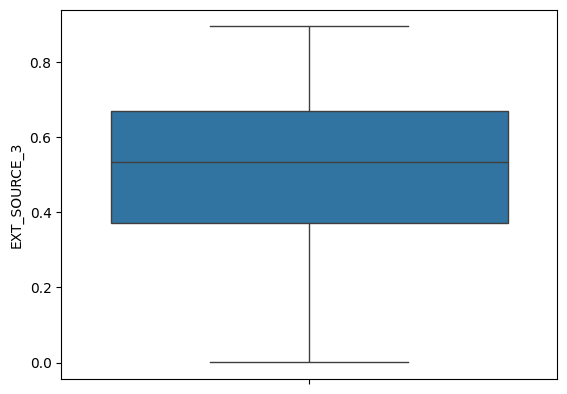

In [15]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [16]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [17]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(0.0)

In [18]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.028275     0.000325
0.858178     0.000325
0.849170     0.000325
0.887664     0.000325
0.864212     0.000325
Name: proportion, Length: 814, dtype: float64

In [19]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [20]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [21]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().mean()*100

np.float64(13.501630835970097)

In [22]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [23]:
Cols=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [24]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [25]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [26]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [27]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [28]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.353855    0.000326
0.200589    0.000326
0.146779    0.000326
0.288490    0.000326
0.269471    0.000326
Name: proportion, Length: 119831, dtype: float64

In [29]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)

OBS_30_CNT_SOCIAL_CIRCLE
0.0      0.534797
1.0      0.159167
2.0      0.097256
3.0      0.066306
4.0      0.046145
5.0      0.031169
6.0      0.021055
7.0      0.014323
8.0      0.009681
9.0      0.006535
10.0     0.004490
11.0     0.002780
12.0     0.002127
13.0     0.001341
14.0     0.000842
15.0     0.000542
16.0     0.000434
17.0     0.000287
18.0     0.000150
19.0     0.000144
20.0     0.000098
21.0     0.000095
22.0     0.000072
23.0     0.000049
25.0     0.000036
24.0     0.000036
27.0     0.000016
26.0     0.000010
30.0     0.000007
29.0     0.000003
28.0     0.000003
47.0     0.000003
348.0    0.000003
Name: proportion, dtype: float64

In [30]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [31]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [32]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(),inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [33]:
null_cols =list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [34]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [35]:
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH=app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION=app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))

In [36]:
app_df["YEARS_BIRTH"]=app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"]=app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"]=app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"]=app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"]=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

In [37]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
425326.5     0.000325
1247643.0    0.000325
264600.0     0.000325
766444.5     0.000325
1317807.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [38]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [39]:
app_df["AMT_CREDIT_Category"]=pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=["Very low Credit","Low Credit","Medium Credit","High Credit","Very High Credit"])

In [40]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very High Credit    11.928504
Name: proportion, dtype: float64

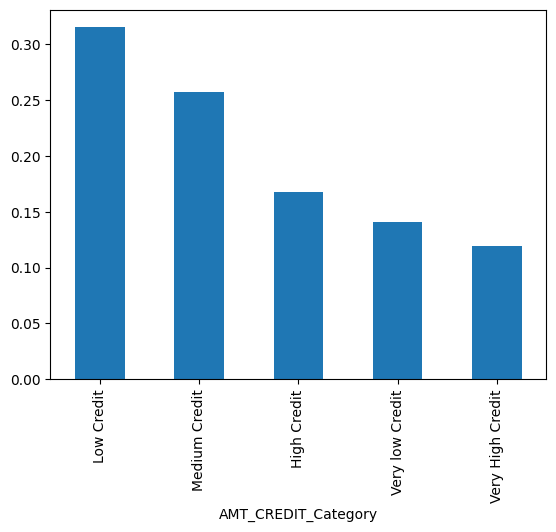

In [41]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

In [42]:
app_df["AGE_Category"]= pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],labels=["Below 25","25-45","45-65","65-85"])

In [43]:
app_df.AGE_Category.value_counts(normalize=True)*100

AGE_Category
25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

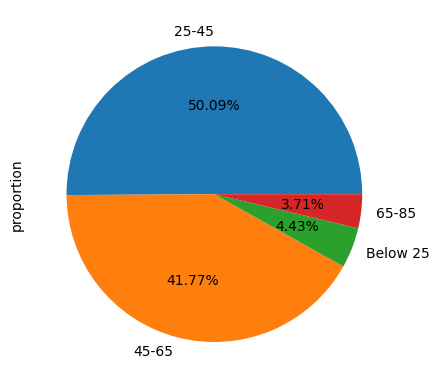

In [44]:
app_df["AGE_Category"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.show

In [45]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [46]:
tar_0=app_df[app_df.TARGET==0]
tar_1=app_df[app_df.TARGET==1]

In [47]:
app_df.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [48]:
cat_cols=list(app_df.columns[app_df.dtypes==object])
num_cols=list(app_df.columns[app_df.dtypes==np.int64])+list(app_df.columns[app_df.dtypes==np.float64])


In [49]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [50]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


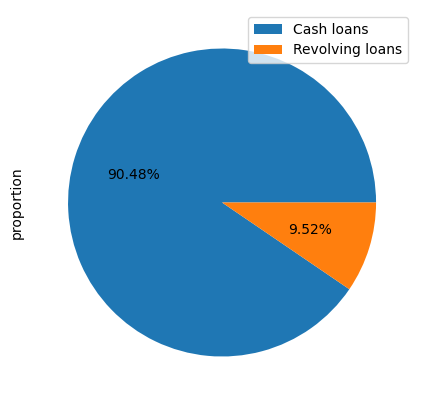

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


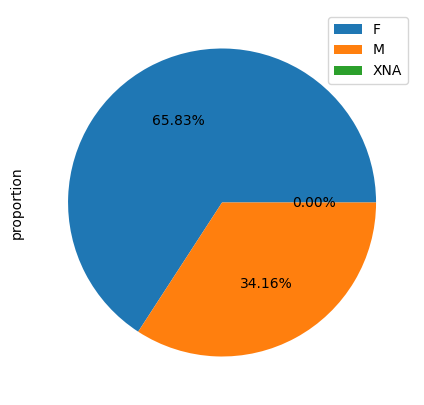

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


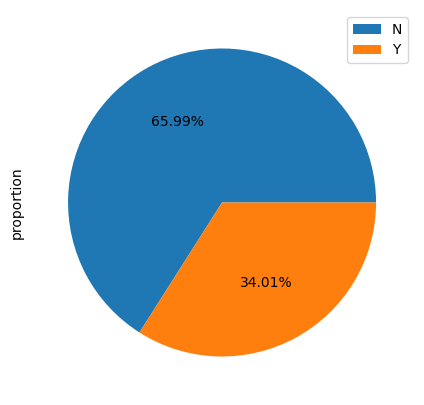

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


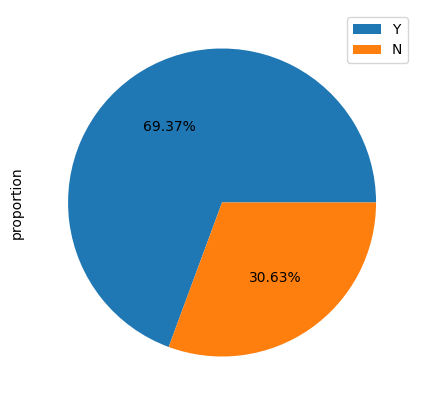

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


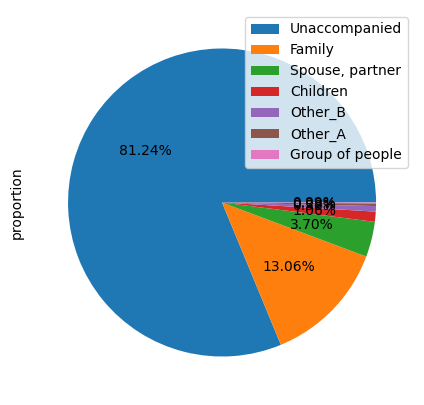

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


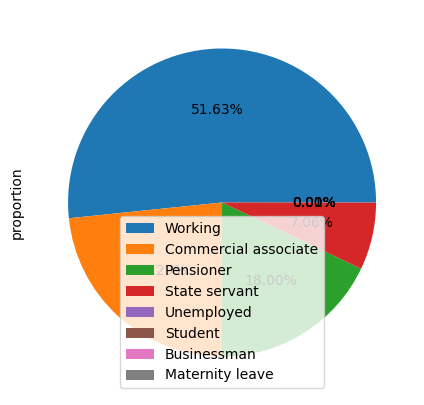

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


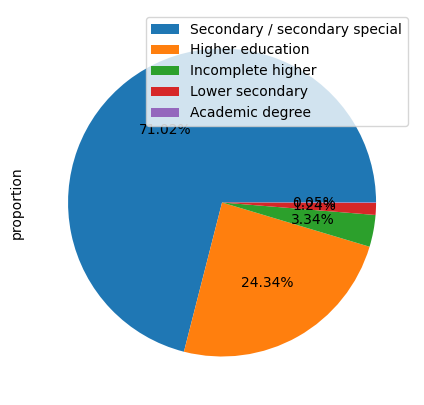

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


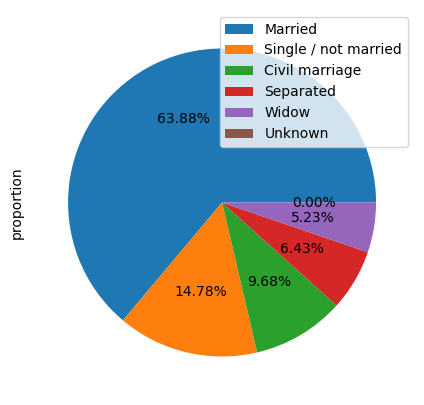

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


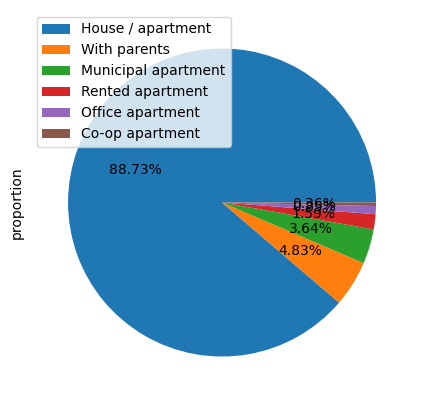

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


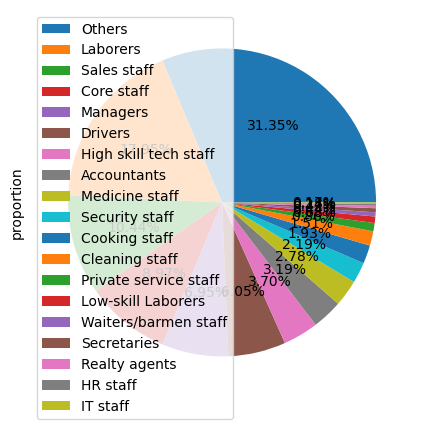

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


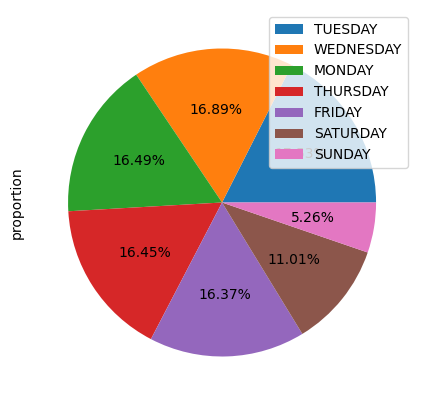

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

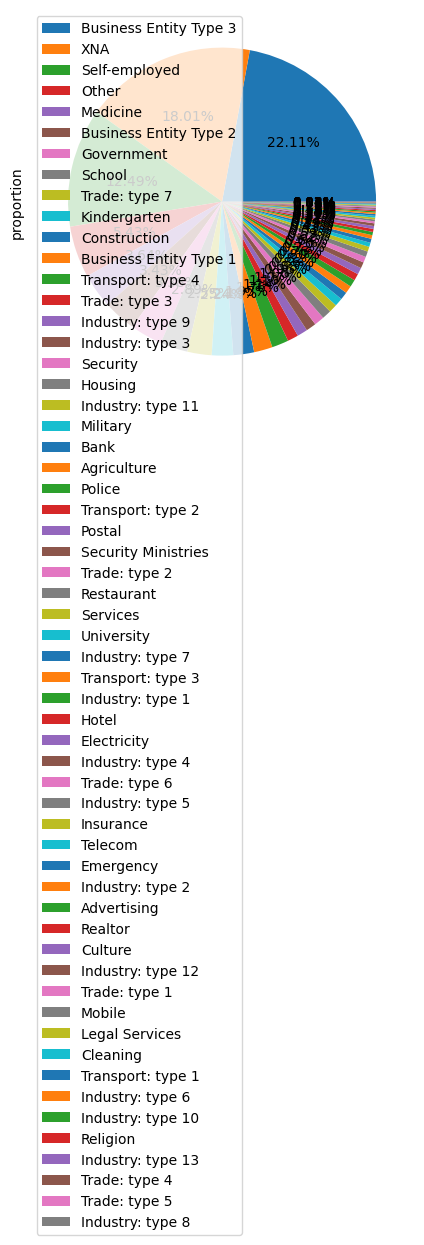

In [51]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct="%1.2f%%")
    plt.legend()
    plt.show()

In [52]:
num_cols_withoutflag=[]
num_cols_withflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [53]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


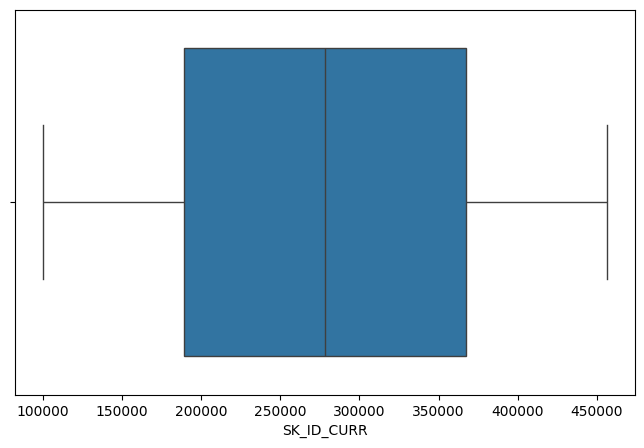

---------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


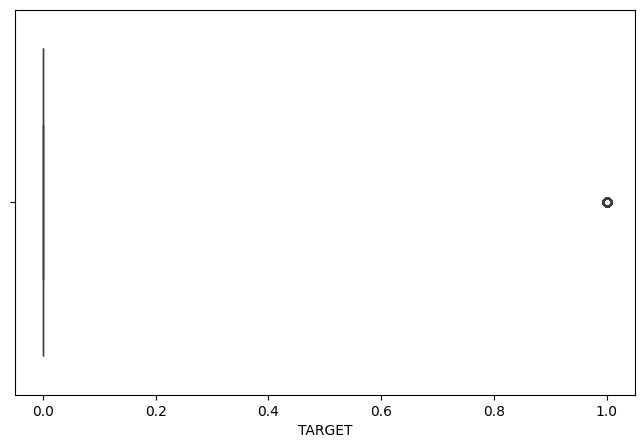

---------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


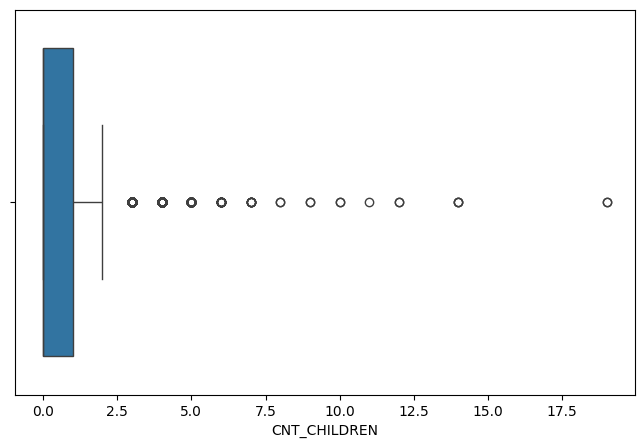

---------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


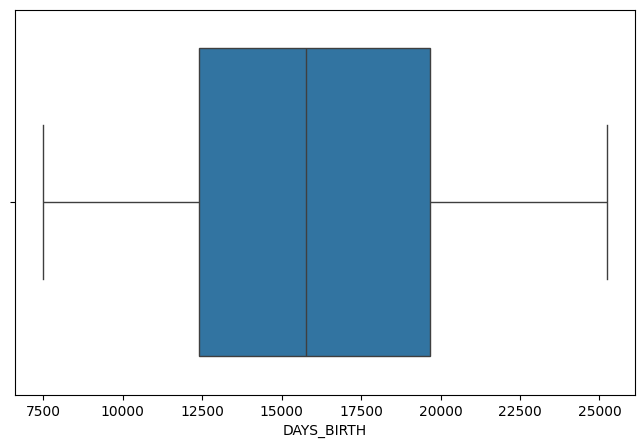

---------------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


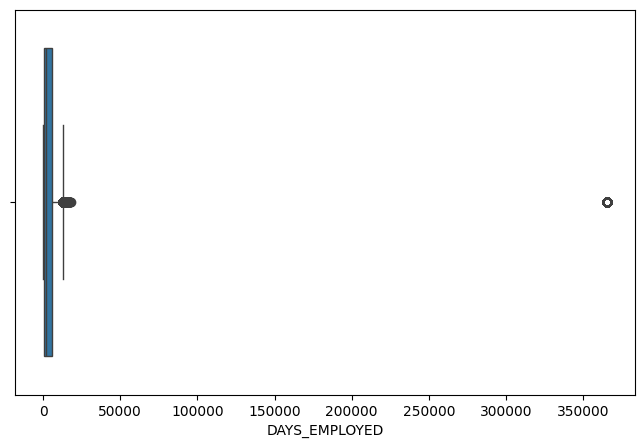

---------------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


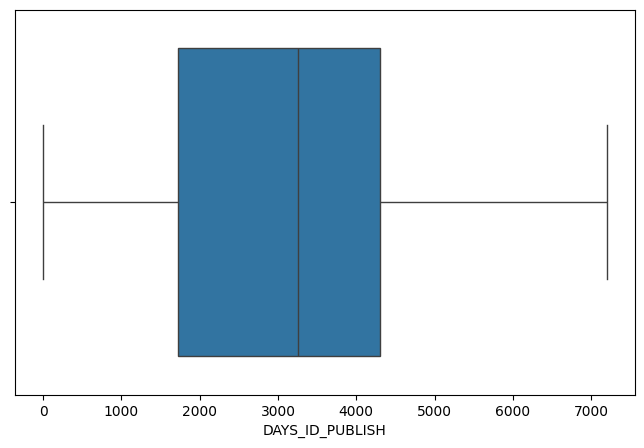

---------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


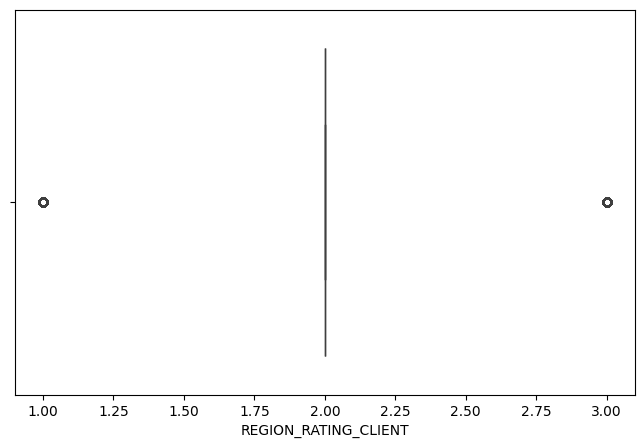

---------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


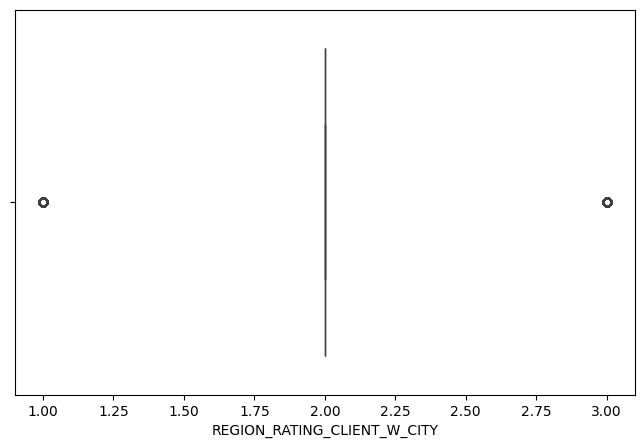

---------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


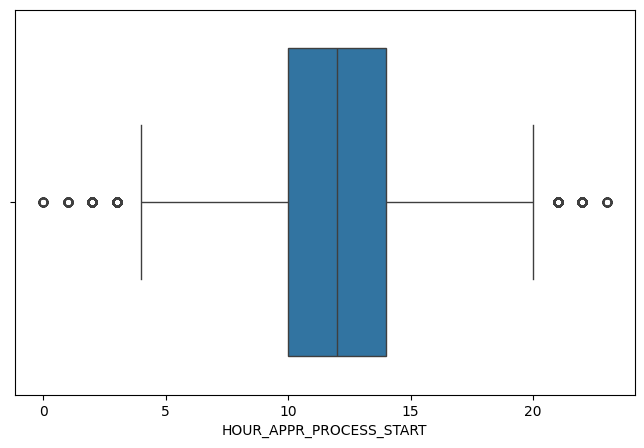

---------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


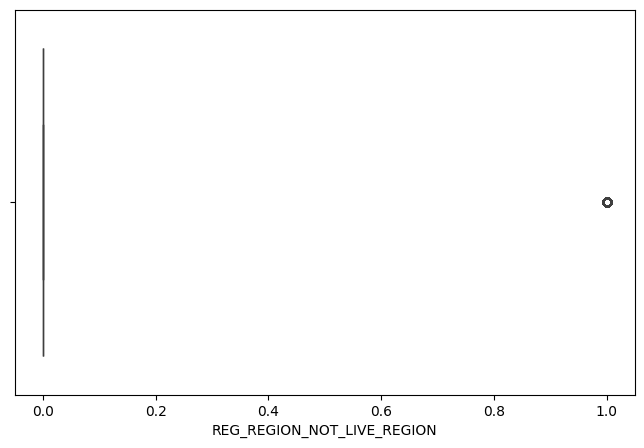

---------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


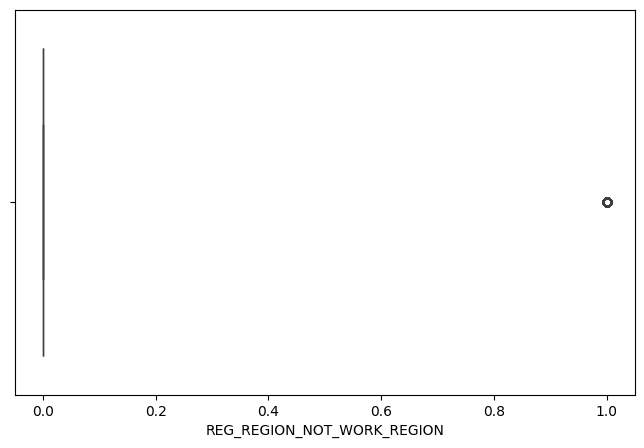

---------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


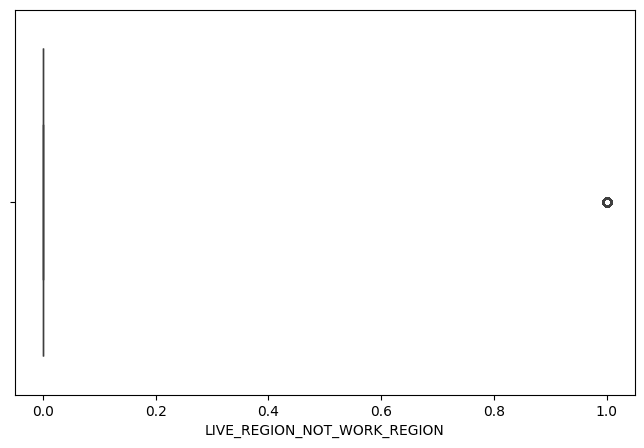

---------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


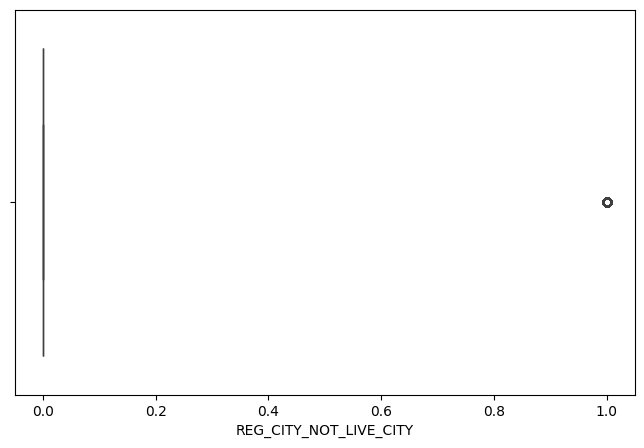

---------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


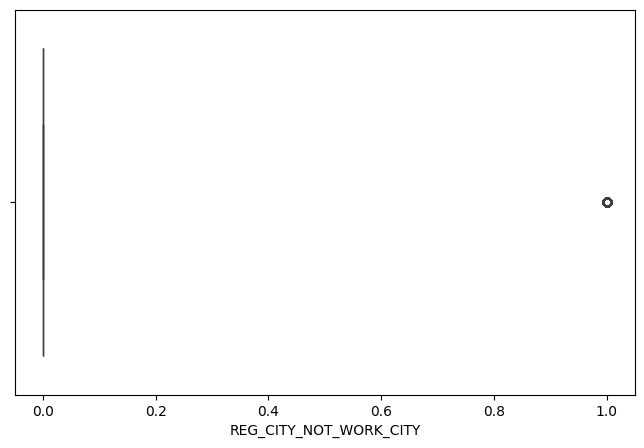

---------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


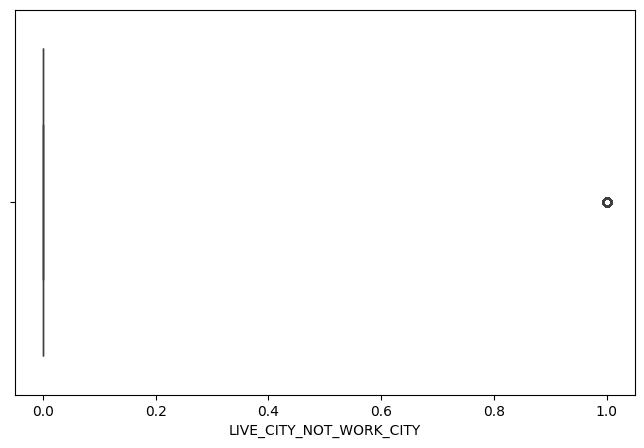

---------------------
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


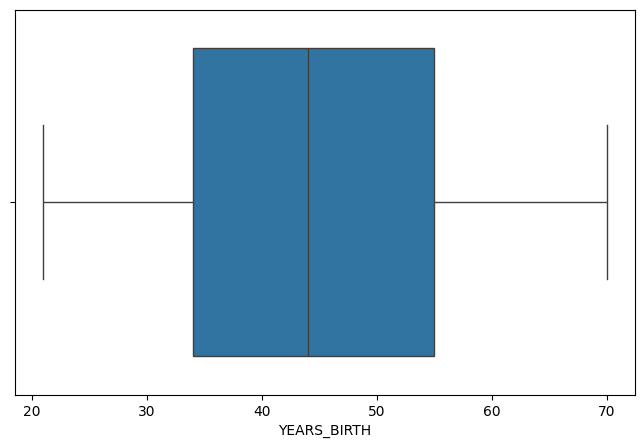

---------------------
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


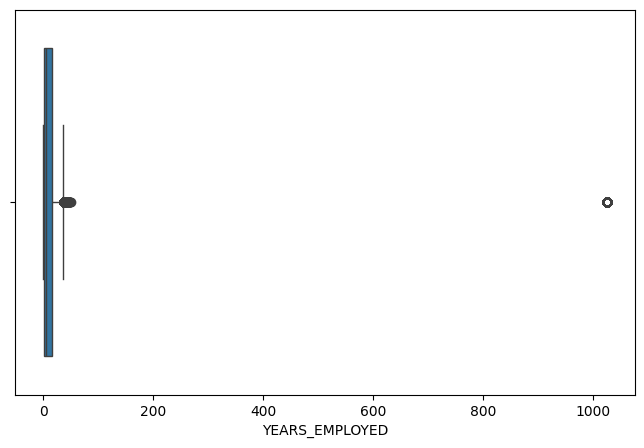

---------------------
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


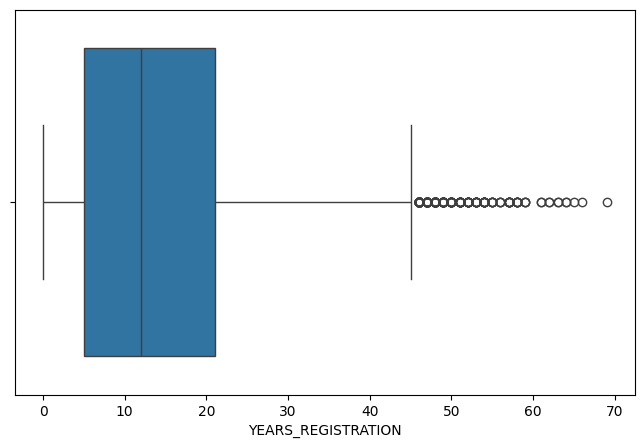

---------------------
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


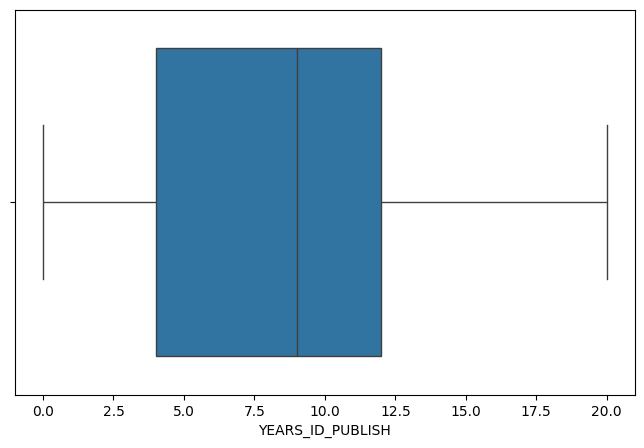

---------------------
count    307511.000000
mean          2.293102
std           2.249671
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


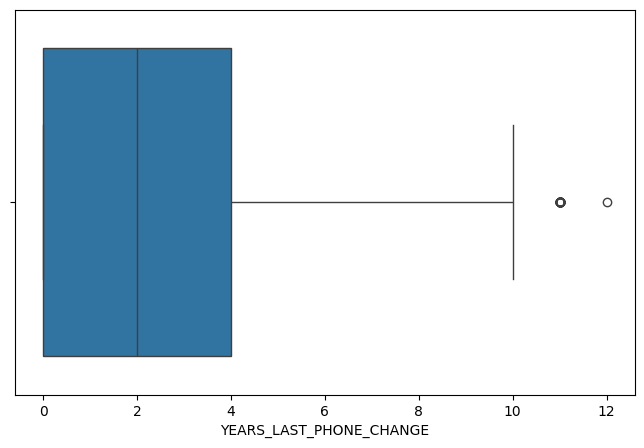

---------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


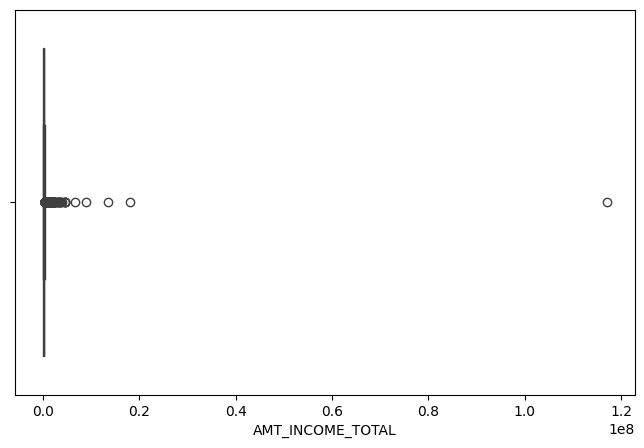

---------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


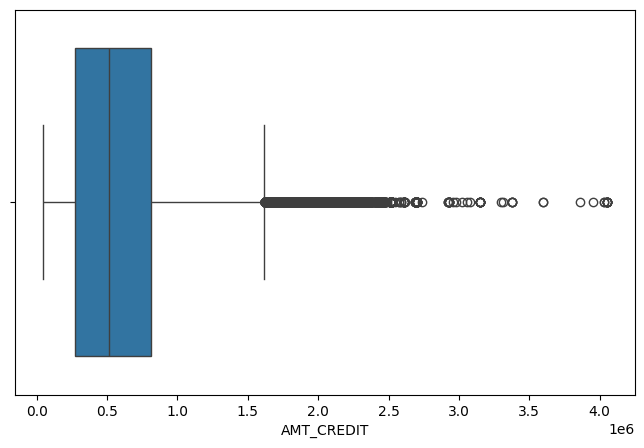

---------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


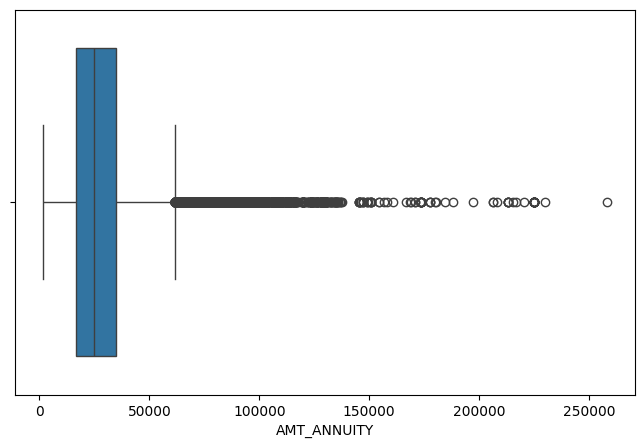

---------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


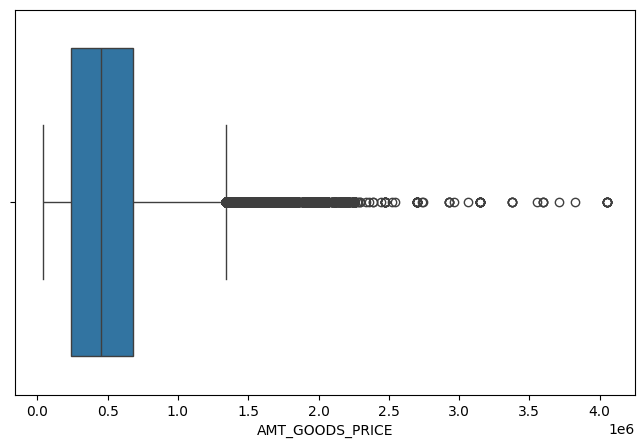

---------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


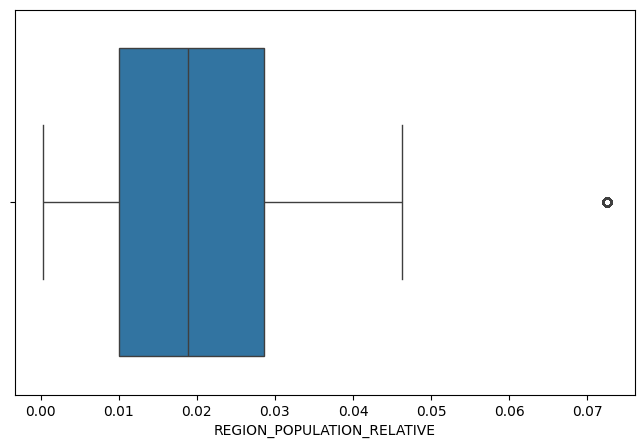

---------------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


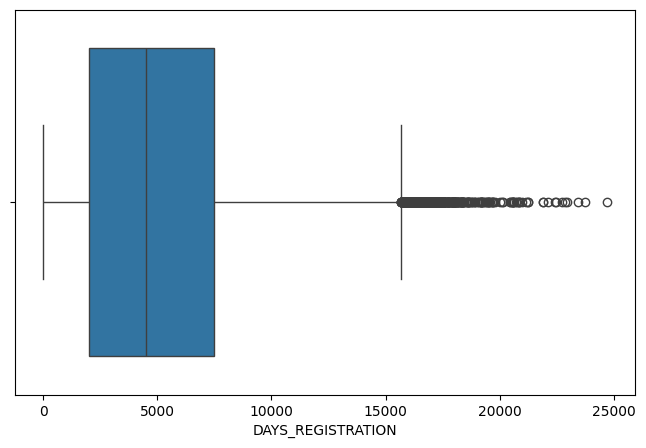

---------------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


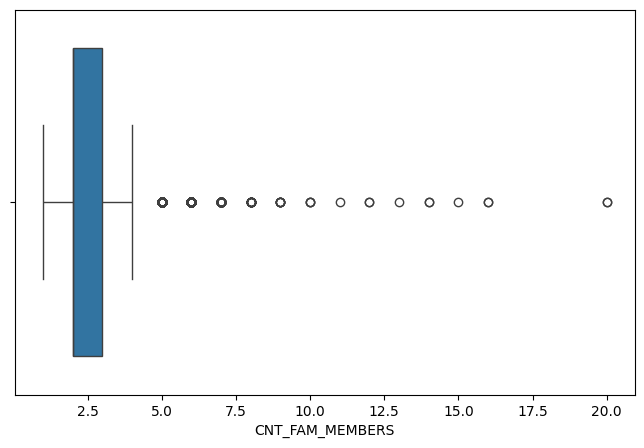

---------------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


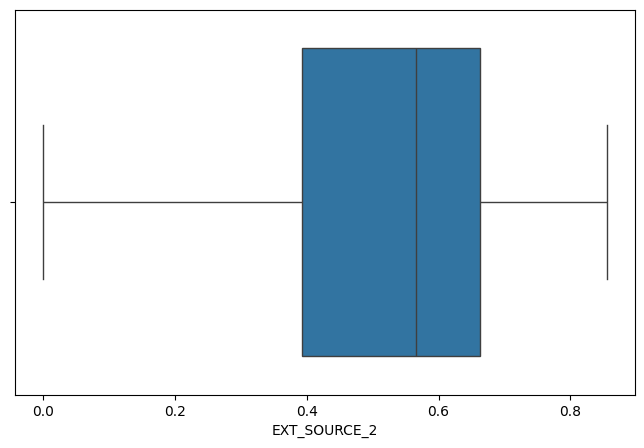

---------------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


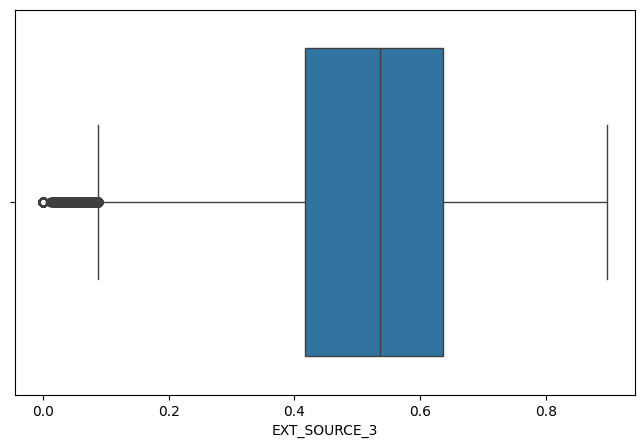

---------------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


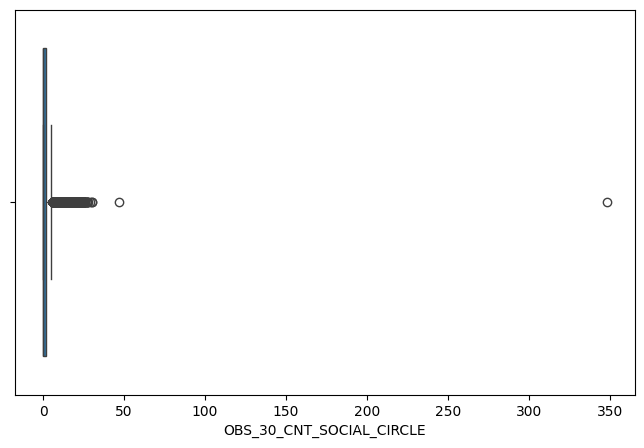

---------------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


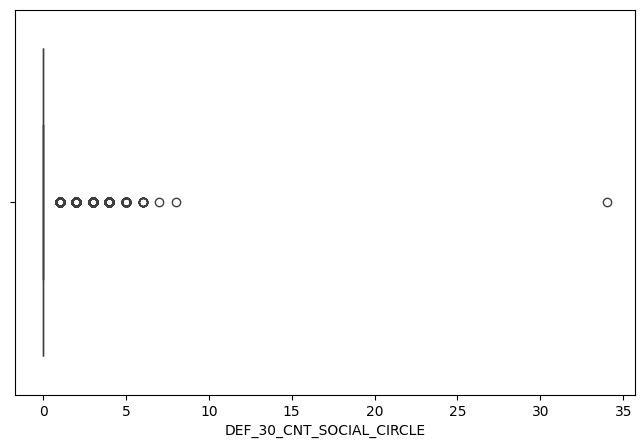

---------------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


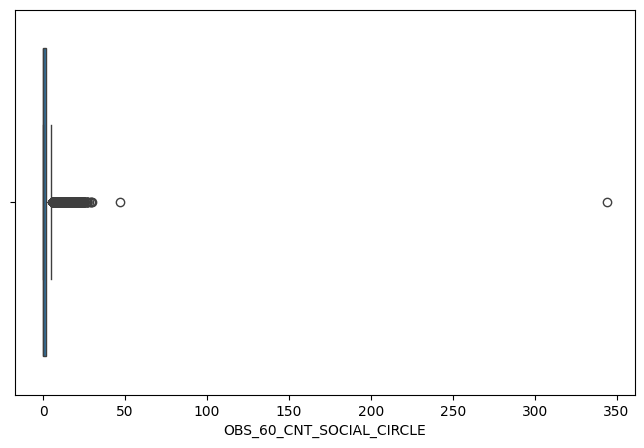

---------------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


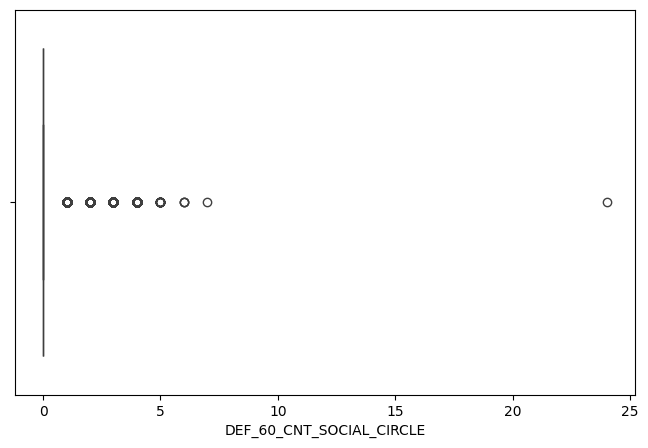

---------------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


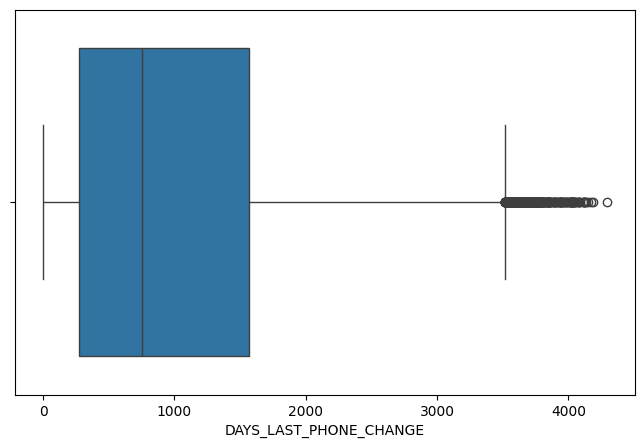

---------------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


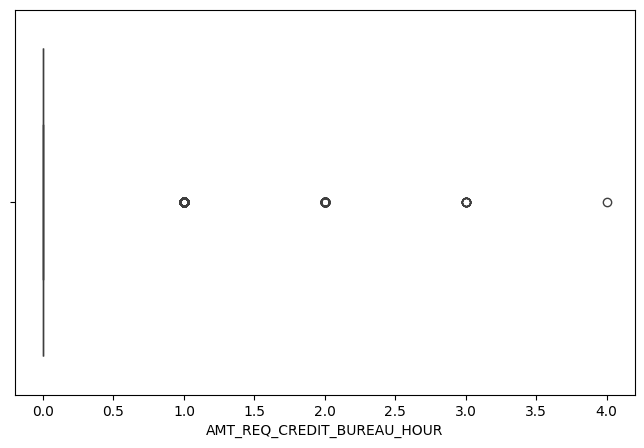

---------------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


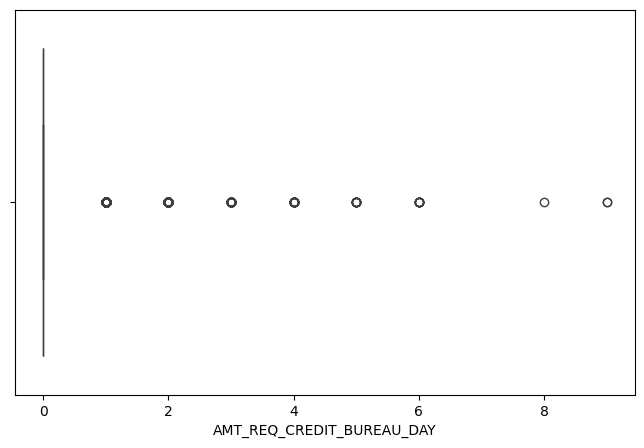

---------------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


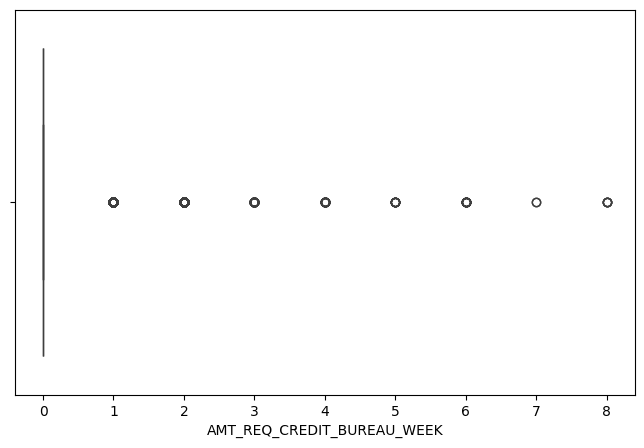

---------------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


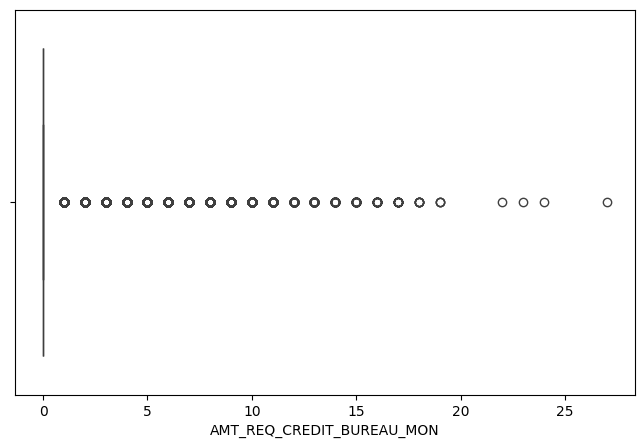

---------------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


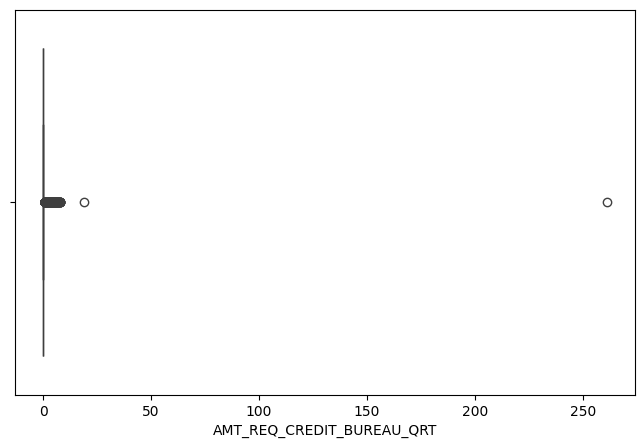

---------------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


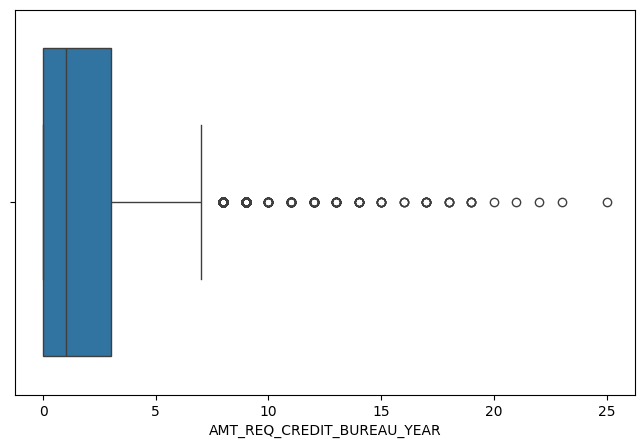

---------------------


In [54]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()
    print("---------------------")

PIot on NAME_CONTRACT_TYPE for Target 0 and I


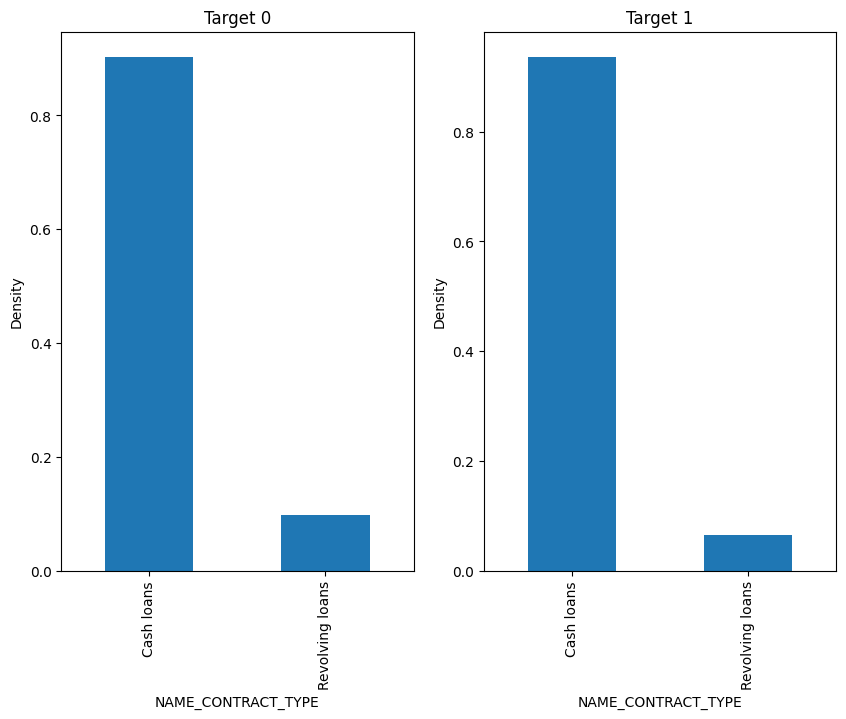



---------------------------------------
PIot on CODE_GENDER for Target 0 and I


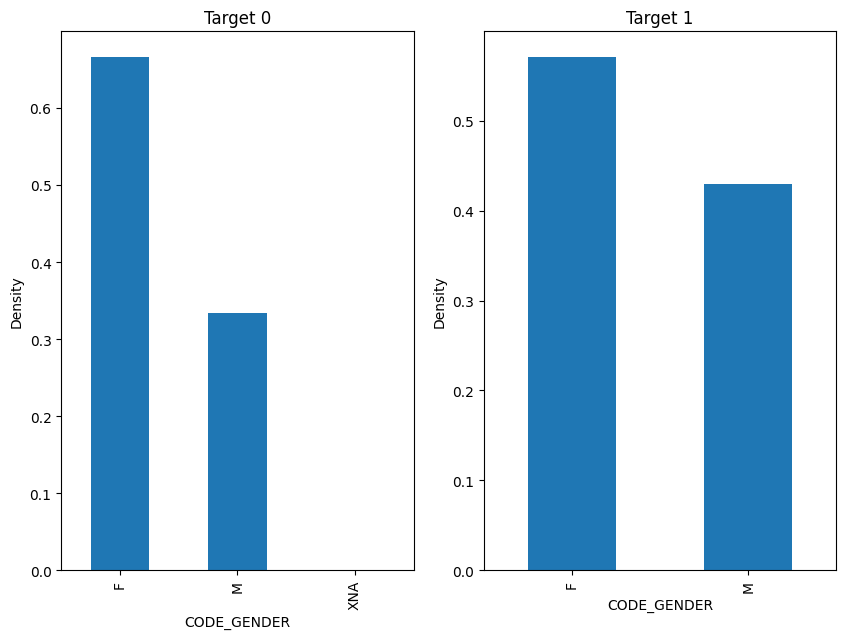



---------------------------------------
PIot on FLAG_OWN_CAR for Target 0 and I


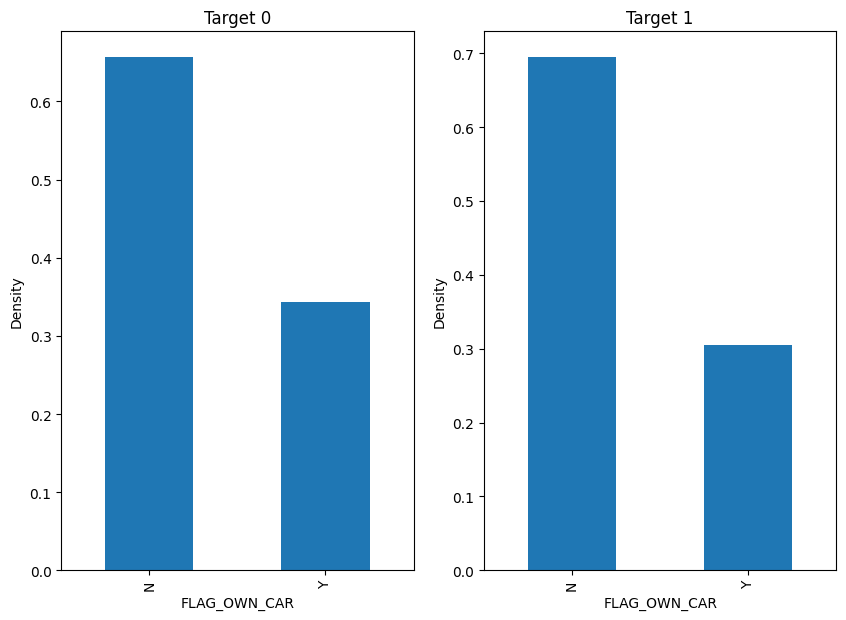



---------------------------------------
PIot on FLAG_OWN_REALTY for Target 0 and I


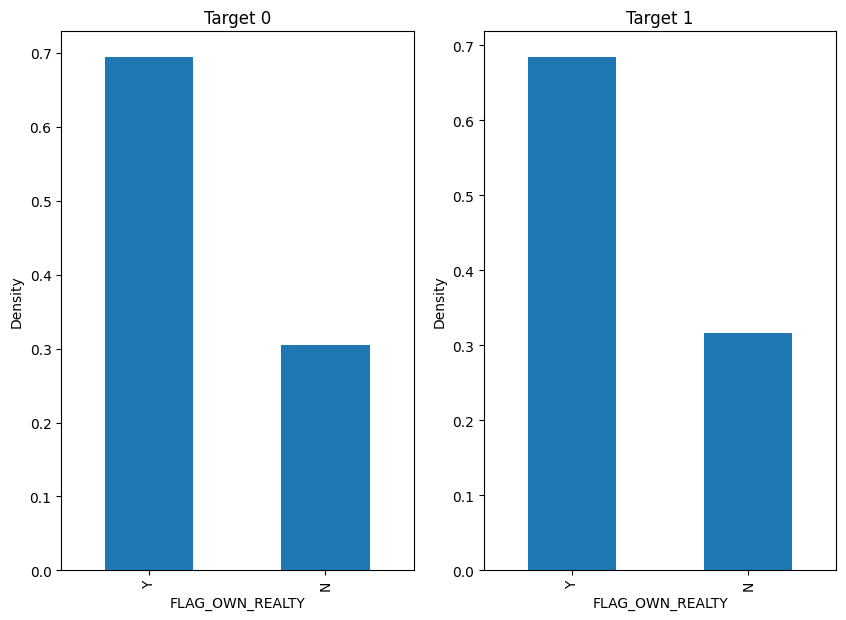



---------------------------------------
PIot on NAME_TYPE_SUITE for Target 0 and I


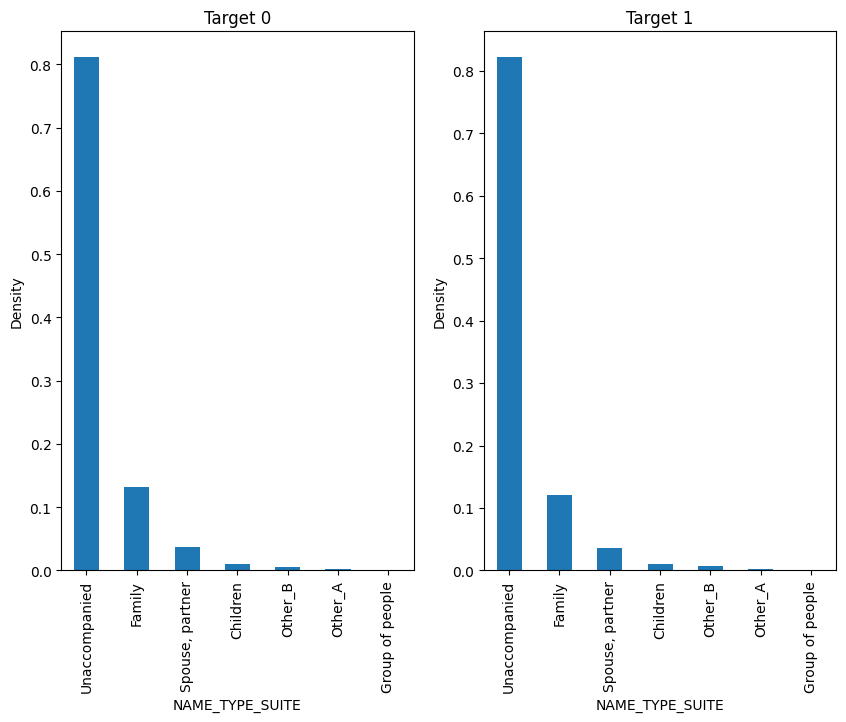



---------------------------------------
PIot on NAME_INCOME_TYPE for Target 0 and I


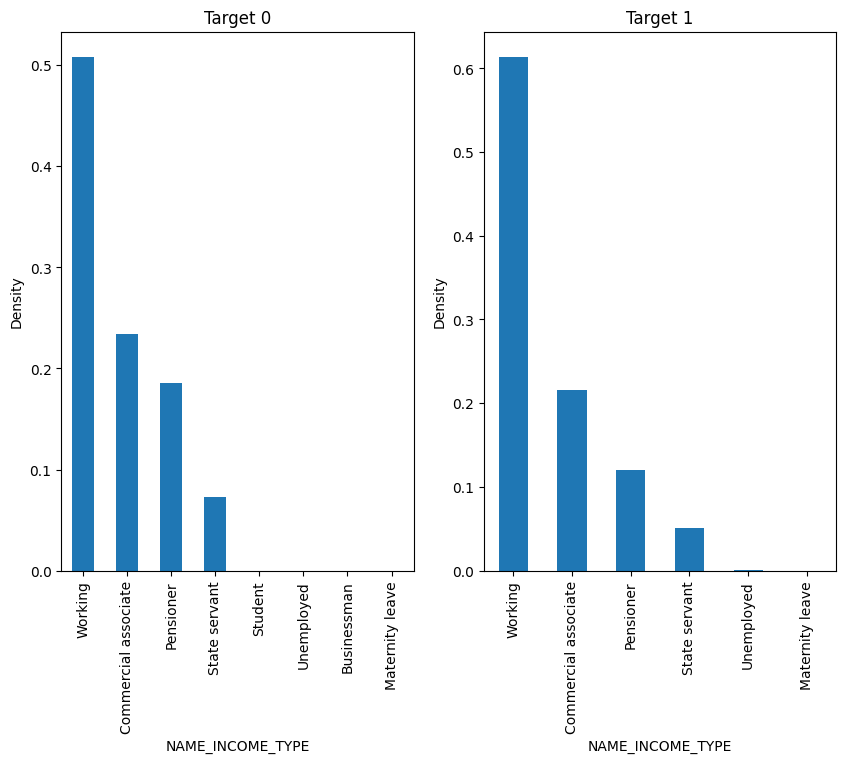



---------------------------------------
PIot on NAME_EDUCATION_TYPE for Target 0 and I


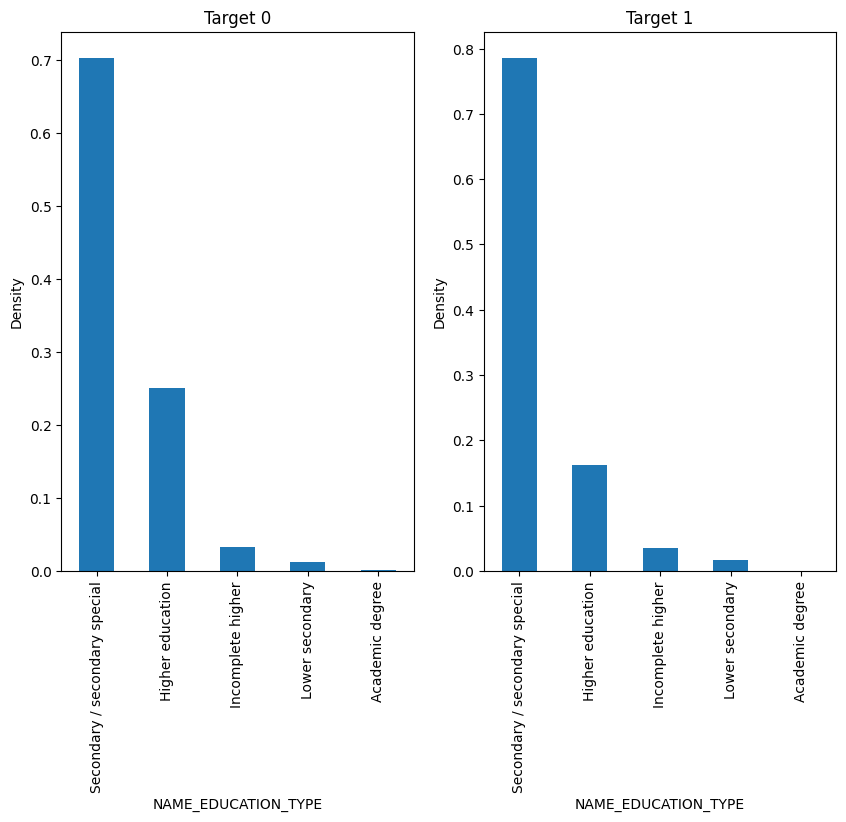



---------------------------------------
PIot on NAME_FAMILY_STATUS for Target 0 and I


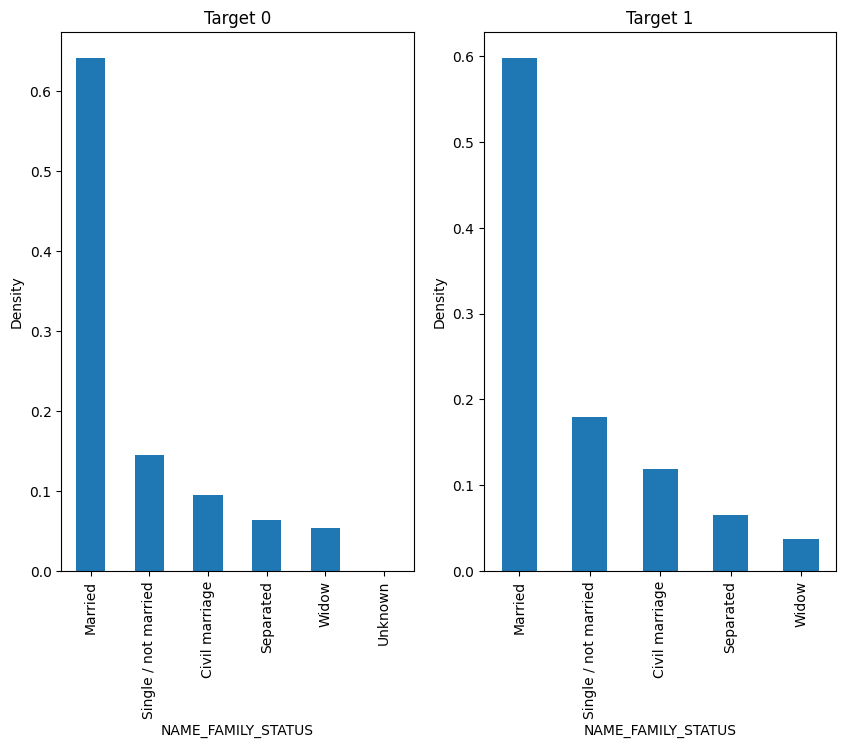



---------------------------------------
PIot on NAME_HOUSING_TYPE for Target 0 and I


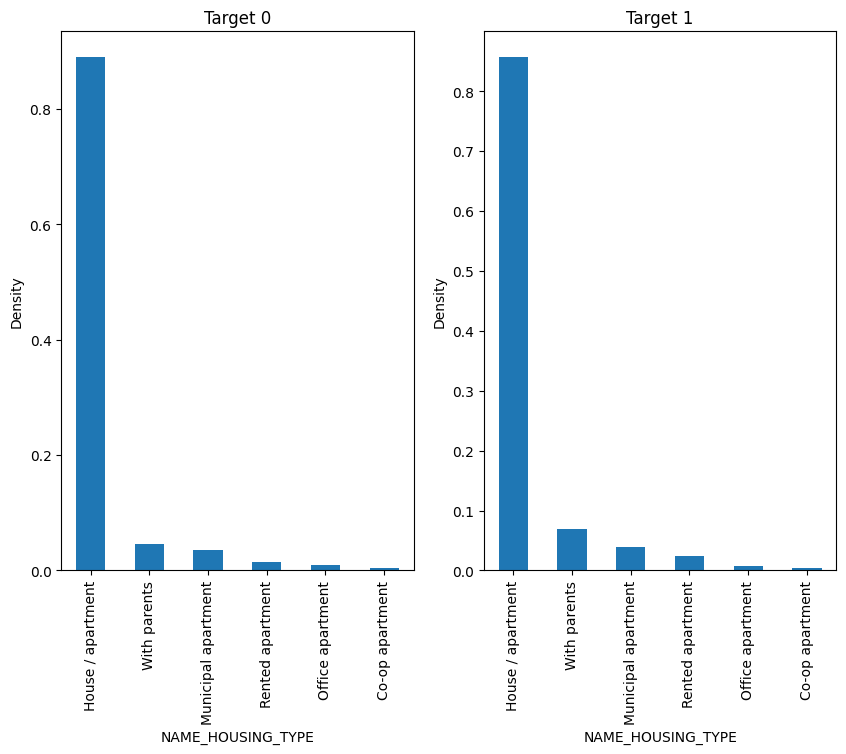



---------------------------------------
PIot on OCCUPATION_TYPE for Target 0 and I


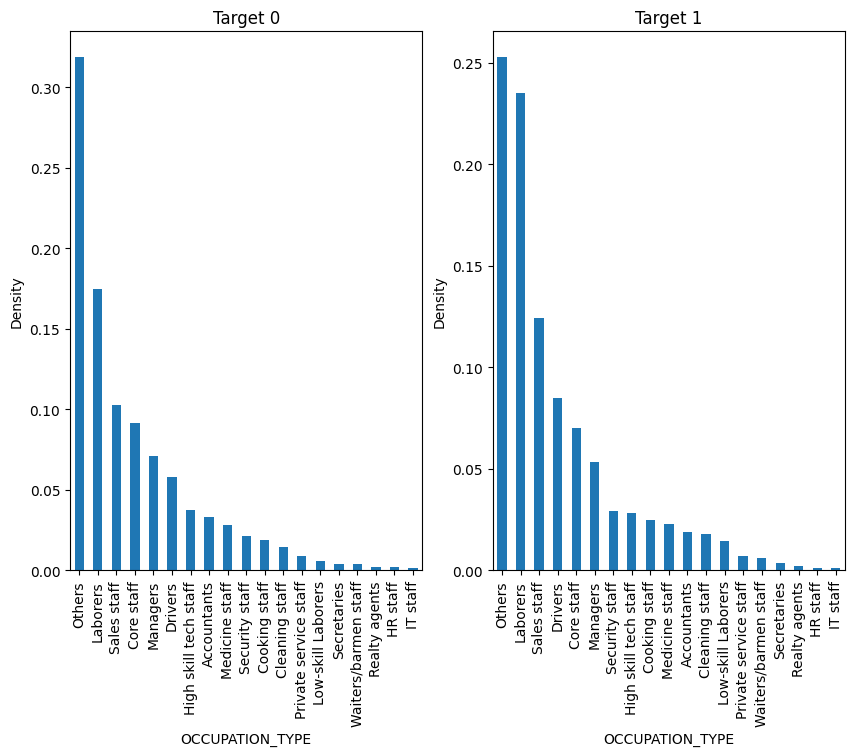



---------------------------------------
PIot on WEEKDAY_APPR_PROCESS_START for Target 0 and I


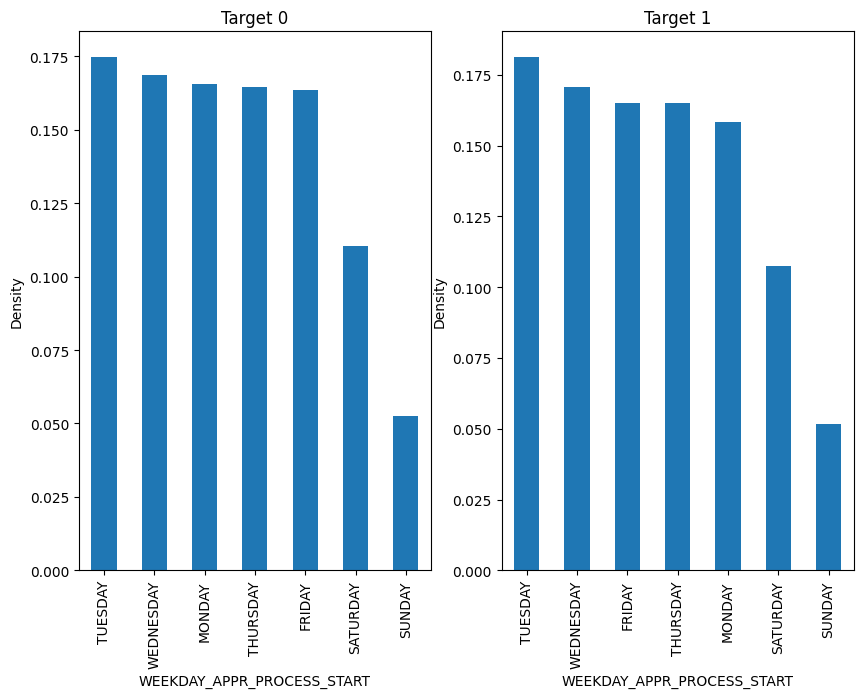



---------------------------------------
PIot on ORGANIZATION_TYPE for Target 0 and I


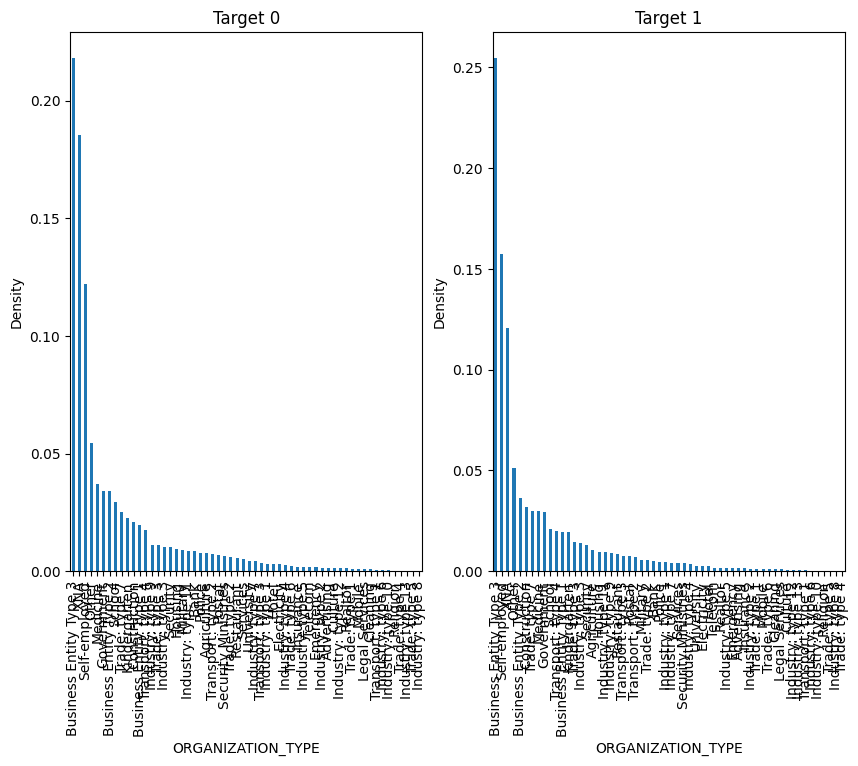



---------------------------------------


In [55]:
for col in cat_cols:
    print(f"PIot on {col} for Target 0 and I")
    plt.figure(figsize=[10, 7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar( )
    plt.title( "Target 0")
    plt.xlabel(col)
    plt.ylabel( "Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar( )
    plt.title( "Target 1")
    plt.xlabel(col)
    plt.ylabel( "Density" )
    plt.show()
    print("\n\n---------------------------------------")

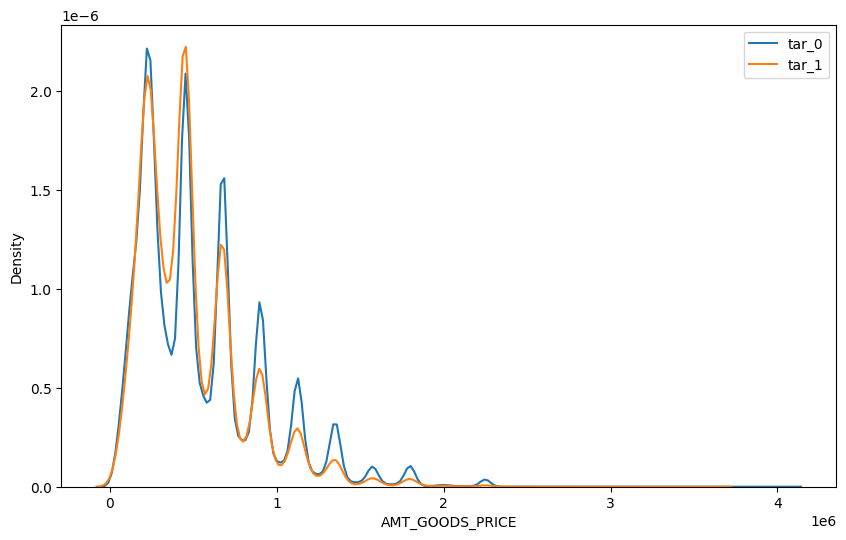

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0["AMT_GOODS_PRICE"],label='tar_0',hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"],label='tar_1',hist=False)
plt.legend()
plt.show()

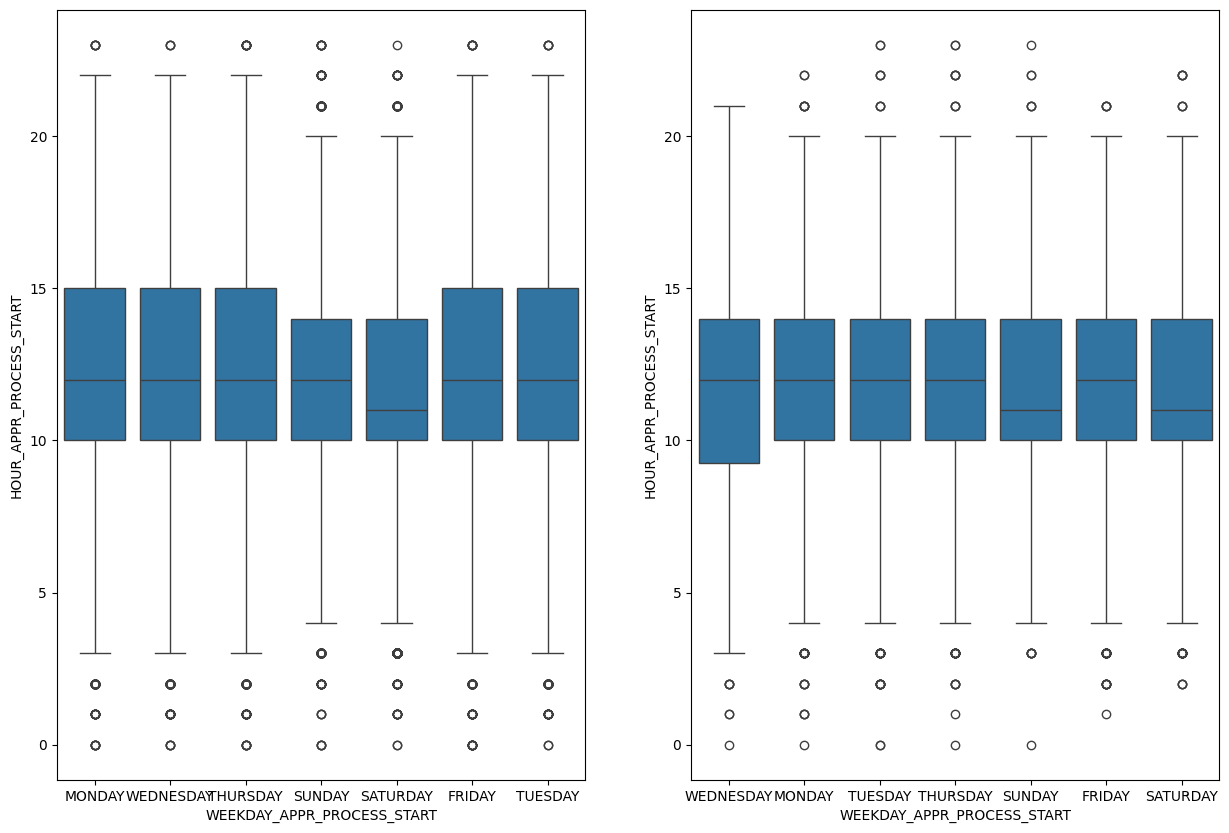

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START",y="HOUR_APPR_PROCESS_START",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START",y="HOUR_APPR_PROCESS_START",data=tar_1)
plt.show()

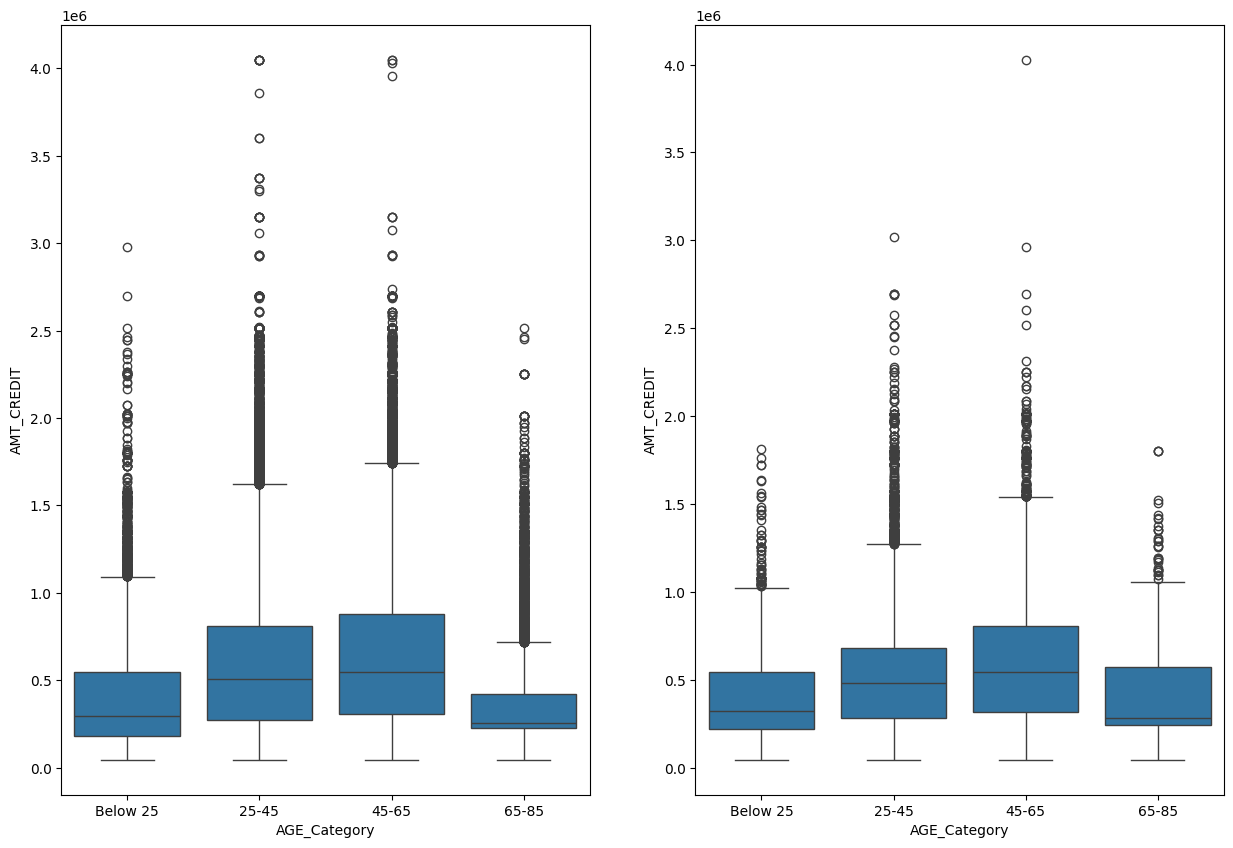

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="AGE_Category",y="AMT_CREDIT",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="AGE_Category",y="AMT_CREDIT",data=tar_1)
plt.show()

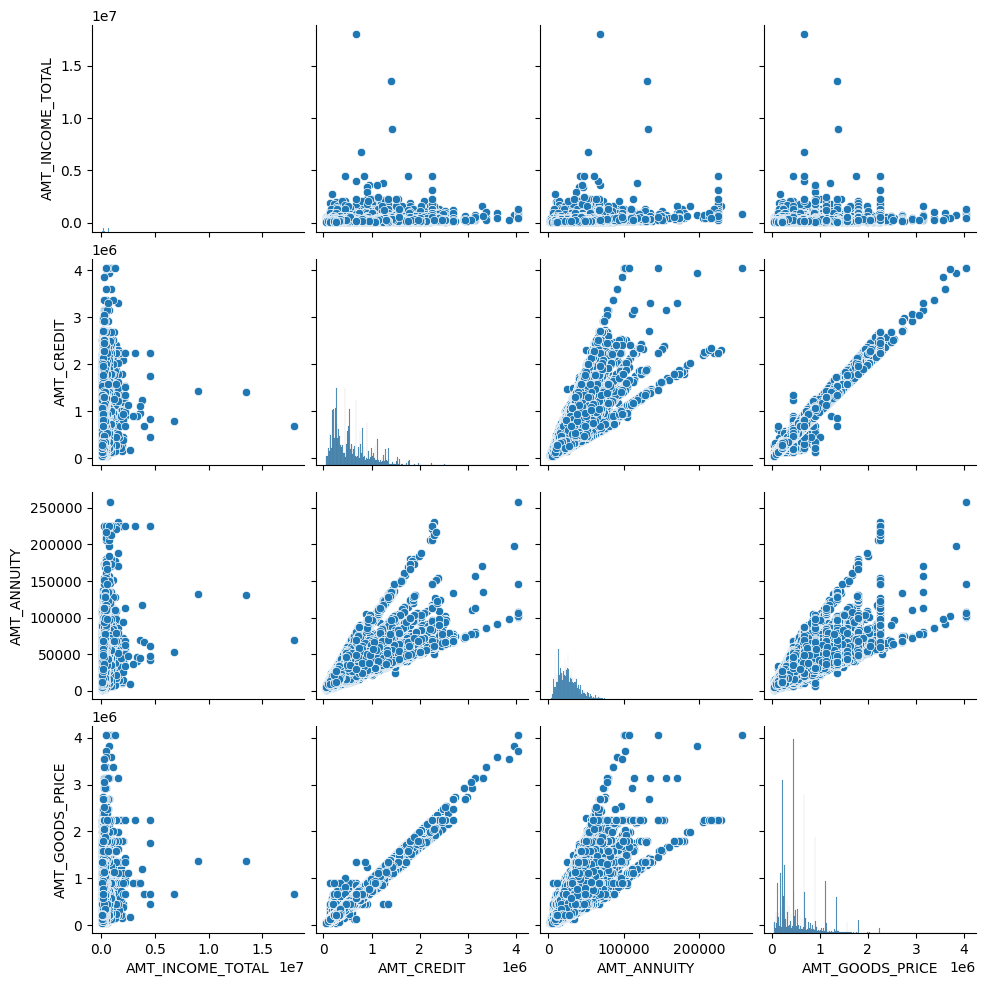

In [59]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()


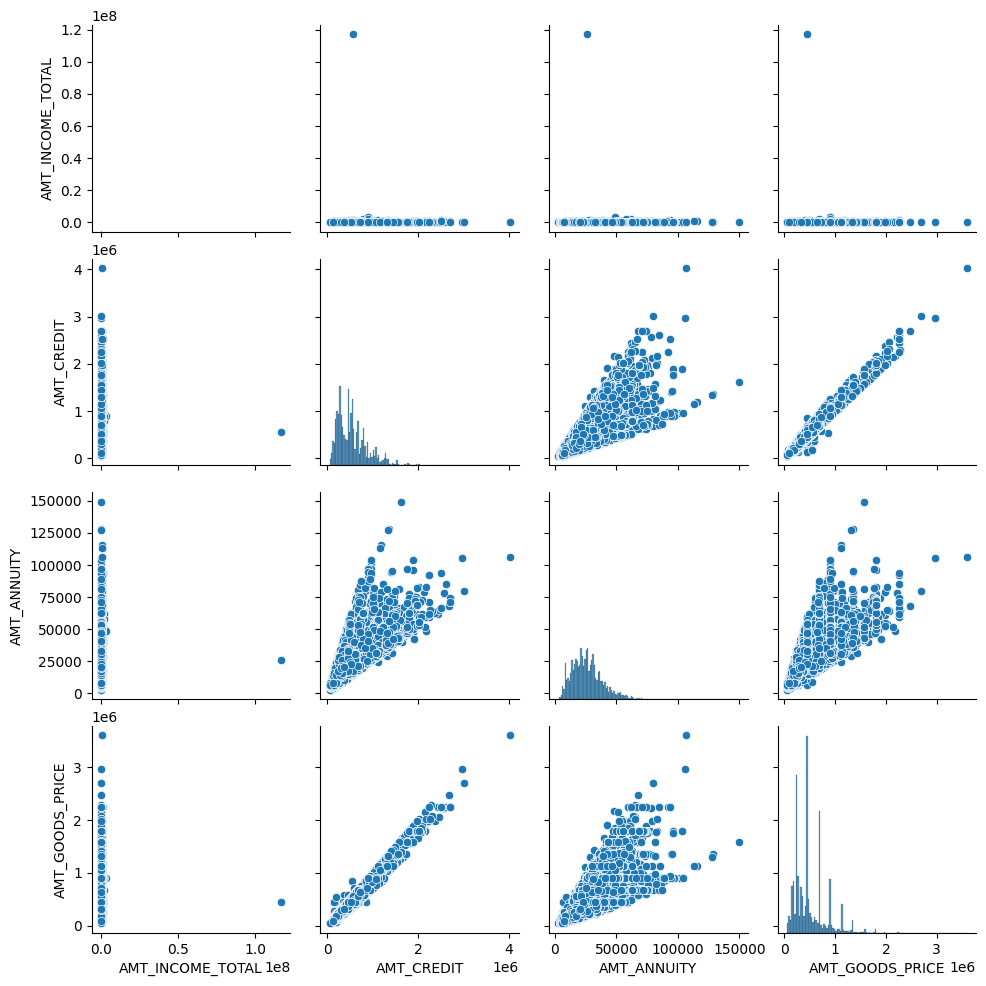

In [60]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

In [69]:
corr_data =app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [70]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027239    0.055373    -0.009519   
YEARS_EMPLOYED                  -0.063837   -0.064321    -0.102849   
YEARS_REGISTRATION              -0.027882   -0.009590    -0.038487   
YEARS_ID_PUBLISH                -0.008459    0.006942    -0.011376   
YEARS_LAST_PHONE_CHANGE          0.018571    0.077257     0.064494   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027239       -0.063837   
AMT_CREDIT                      0.986734     0.055373       -0.064321   
AMT_ANNUITY                     0.774837    -0.009519       -0.102849   
AMT_GOODS_PRICE                 1.000000     0.053449       -0.062193   
YEARS_BIRTH                     0.053449     1.000000        0.623745   
YEARS_EMPLOYED                 -0.062193     0.623745        1.000000   
YEARS_REGISTRATION             -0.011518     0.331856        0.214652   
YEARS_ID_PUBLISH                0.009647     0.272054        0.274644   
YEARS_LAST_PHONE_CHANGE         0.079349     0.086317       -0.016424   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027882         -0.008459   
AMT_CREDIT                        -0.009590          0.006942   
AMT_ANNUITY                       -0.038487         -0.011376   
AMT_GOODS_PRICE                   -0.011518          0.009647   
YEARS_BIRTH                        0.331856          0.272054   
YEARS_EMPLOYED                     0.214652          0.274644   
YEARS_REGISTRATION                 1.000000          0.101831   
YEARS_ID_PUBLISH                   0.101831          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058393          0.092803   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018571  
AMT_CREDIT                              0.077257  
AMT_ANNUITY                             0.064494  
AMT_GOODS_PRICE                         0.079349  
YEARS_BIRTH                             0.086317  
YEARS_EMPLOYED                         -0.016424  
YEARS_REGISTRATION                      0.058393  
YEARS_ID_PUBLISH                        0.092803  
YEARS_LAST_PHONE_CHANGE                 1.000000

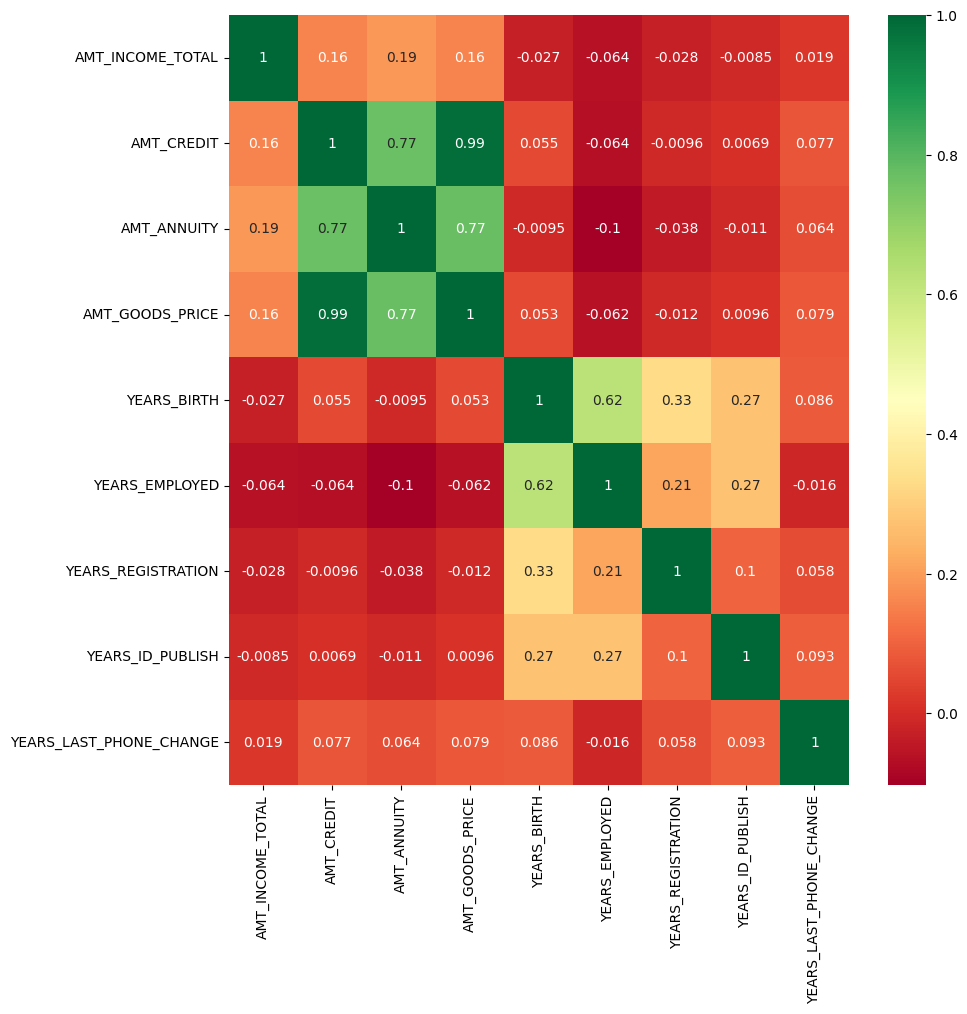

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [73]:
corr_data_0=tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   
5           99000.0    490495.5      27517.5         454500.0           47   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   
5               4                  13                 1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        7

In [74]:
corr_data_1=tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           26   
26          112500.0    979992.0      27076.5         702000.0           52   
40          202500.0   1193580.0      35028.0         855000.0           49   
42          135000.0    288873.0      16258.5         238500.0           37   
81           81000.0    252000.0      14593.5         252000.0           69   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                  10                 5   
26               7                  18                 5   
40               3                   3                 2   
42              10                   0                12   
81            1025                  15                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        3  
42                        4  
81                        0

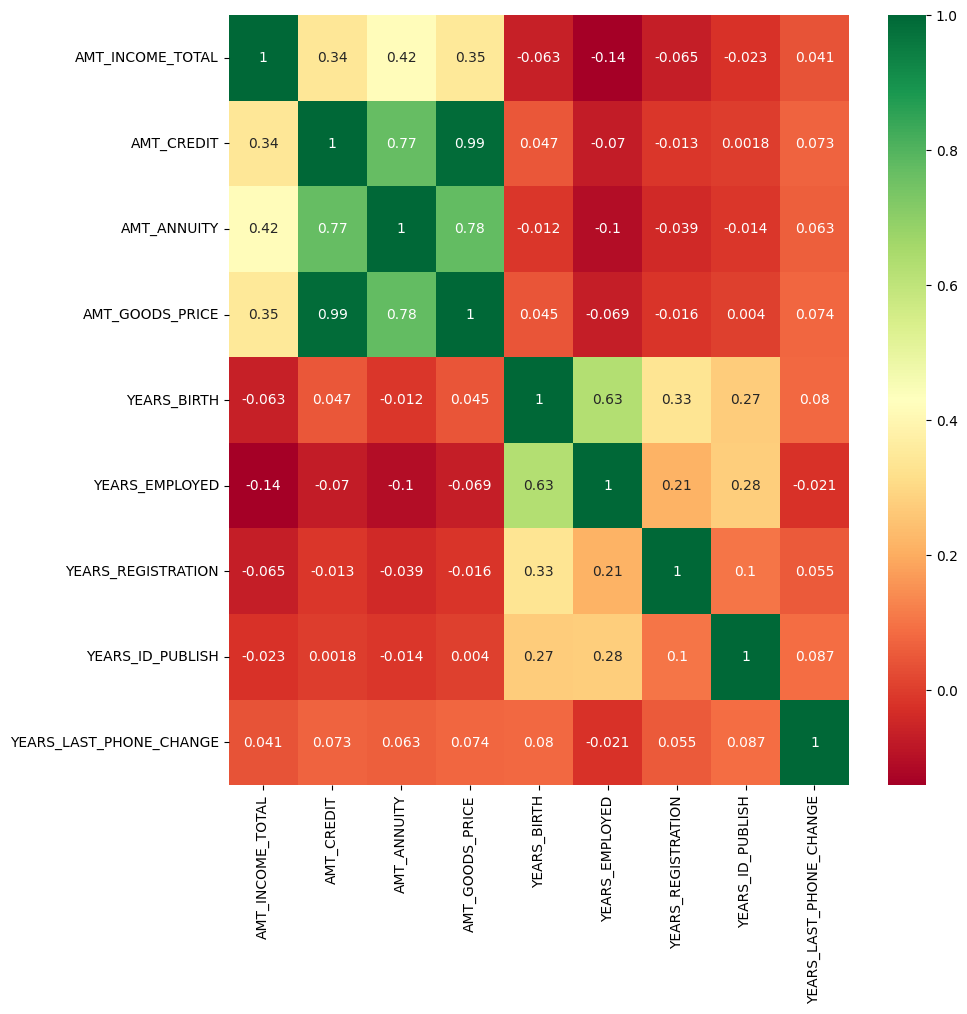

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")
plt.show()

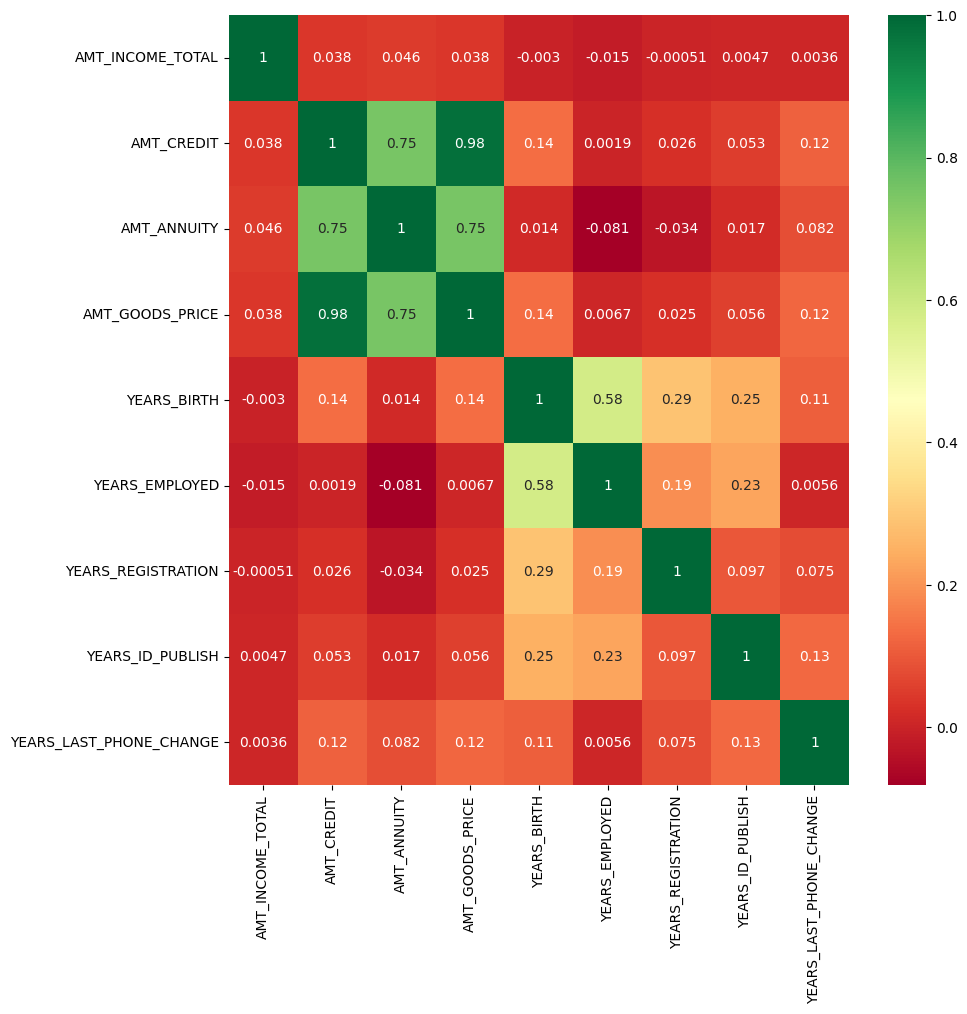

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [91]:
papp_data=pd.read_csv("previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [92]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [93]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.348211
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.348211
RATE_INTEREST_PRIMARY          99.645137
RATE_INTEREST_PRIVILEGED       99.645137
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.127626
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [94]:
percentage=49
threshold_p=int(((100-percentage)/100)*papp_data.shape[0]+1)
papp_df=papp_data.dropna(axis=1,thresh=threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [95]:
papp_df.shape

(1048575, 32)

In [96]:
for col in papp_df.columns:
    if papp_df[col].dtypes==np.int64 or papp_df[col].dtypes==np.float64:
        papp_df[col]=papp_df[col].apply(lambda x: abs(x))

In [97]:
null_cols=list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

10

In [98]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.221205
NAME_YIELD_GROUP

In [100]:
papp_df["AMT_CREDIT_Category"]=pd.cut(papp_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=["Very low Credit","Low Credit","Medium Credit","High Credit","Very High Credit"])

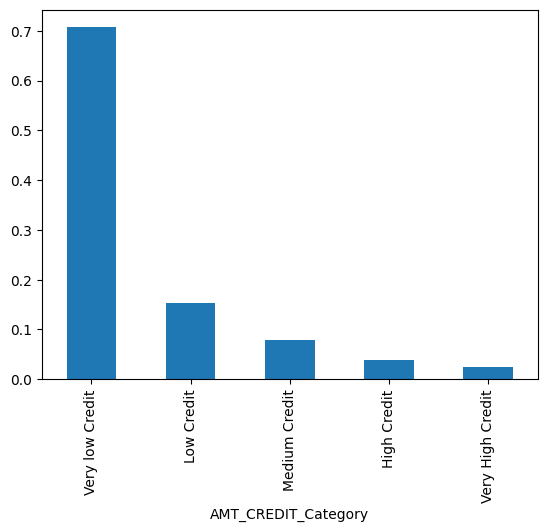

In [102]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

In [109]:
papp_df["AMT_GOODS_PRICE_Category"]=pd.qcut(papp_df.AMT_GOODS_PRICE,[0,0.25,0.45,0.65,0.85,1],labels=["Very low Credit","Low Credit","Medium Credit","High Credit","Very High Credit"])

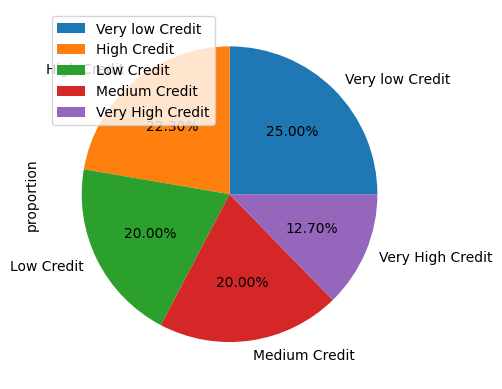

In [110]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

In [111]:
approved=papp_df[papp_df.NAME_CONTRACT_STATUS=="Approved"]
canceled=papp_df[papp_df.NAME_CONTRACT_STATUS=="Canceled"]
refused=papp_df[papp_df.NAME_CONTRACT_STATUS=="Refused"]
unused=papp_df[papp_df.NAME_CONTRACT_STATUS=="Unused offer"]

In [112]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.225973
Canceled        18.809432
Refused         17.364805
Unused offer     1.599790
Name: proportion, dtype: float64

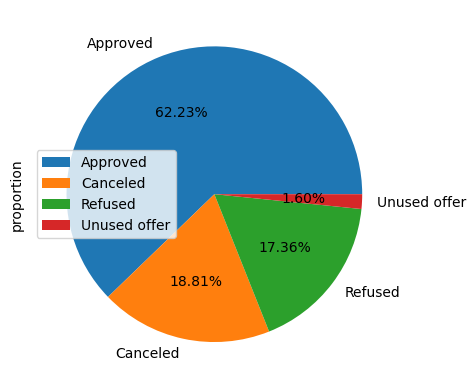

In [113]:
papp_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

In [114]:
cat_cols=list(papp_df.columns[papp_df.dtypes==object])
num_cols=list(papp_df.columns[papp_df.dtypes==np.int64])+list(papp_df.columns[papp_df.dtypes==np.float64])

In [115]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [116]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [117]:
cat_cols=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_SELLER_INDUSTRY","CHANNEL_TYPE","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

In [118]:
num_cols=["HOUR_APPR_PROCESS_START","DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]

NAME_CONTRACT_TYPE
Cash loans         44.428009
Consumer loans     43.969101
Revolving loans    11.581527
XNA                 0.021362
Name: proportion, dtype: float64


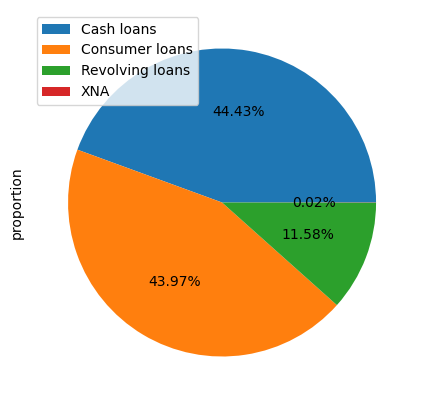

-----------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      15.286460
WEDNESDAY    15.236583
MONDAY       15.180412
FRIDAY       15.082088
THURSDAY     14.879336
SATURDAY     14.451327
SUNDAY        9.883795
Name: proportion, dtype: float64


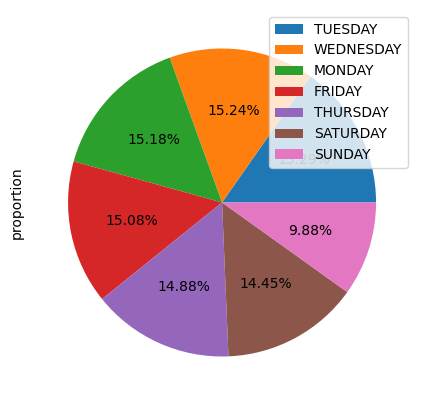

-----------------------
NAME_CONTRACT_STATUS
Approved        62.225973
Canceled        18.809432
Refused         17.364805
Unused offer     1.599790
Name: proportion, dtype: float64


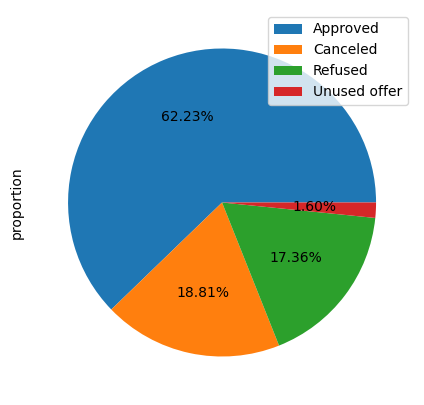

-----------------------
NAME_PAYMENT_TYPE
Cash through the bank                        62.046492
XNA                                          37.389886
Non-cash from your account                    0.499058
Cashless from the account of the employer     0.064564
Name: proportion, dtype: float64


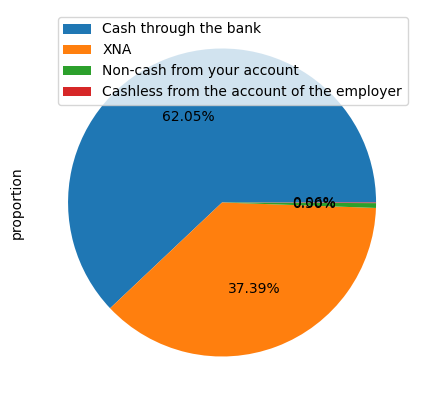

-----------------------
NAME_CLIENT_TYPE
Repeater     73.619627
New          18.118876
Refreshed     8.145435
XNA           0.116062
Name: proportion, dtype: float64


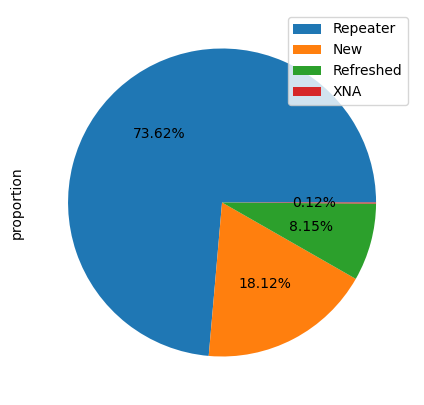

-----------------------
NAME_SELLER_INDUSTRY
XNA                     50.890494
Consumer electronics    24.065804
Connectivity            16.599003
Furniture                3.483108
Construction             1.787473
Clothing                 1.433851
Industry                 1.170732
Auto technology          0.304032
Jewelry                  0.165558
MLM partners             0.070763
Tourism                  0.029182
Name: proportion, dtype: float64


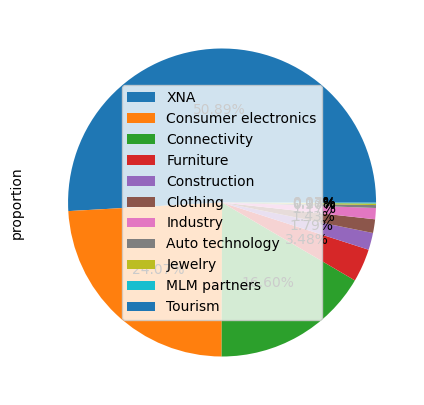

-----------------------
CHANNEL_TYPE
Credit and cash offices       43.015235
Country-wide                  29.820471
Stone                         12.797940
Regional / Local               6.544215
Contact center                 4.001812
AP+ (Cash loan)                3.414730
Channel of corporate sales     0.377465
Car dealer                     0.028133
Name: proportion, dtype: float64


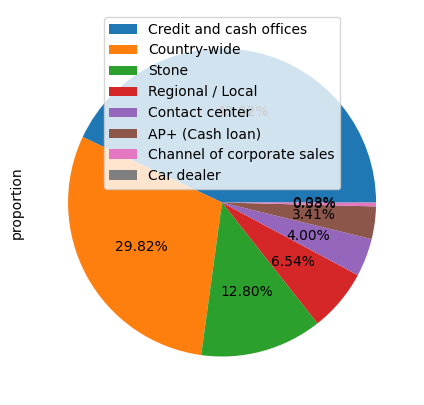

-----------------------
NAME_YIELD_GROUP
XNA           30.893451
middle        23.110221
high          21.162053
low_normal    19.283885
low_action     5.550390
Name: proportion, dtype: float64


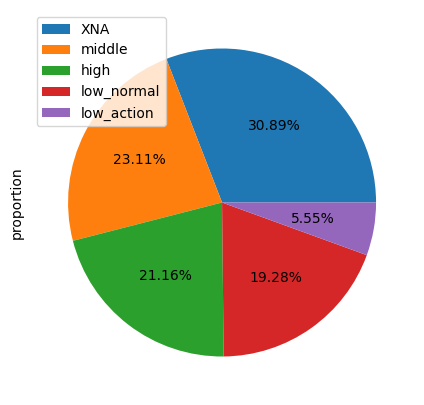

-----------------------
PRODUCT_COMBINATION
Cash                              17.012623
POS household with interest       15.917283
POS mobile with interest          13.275706
Cash X-Sell: middle                8.566406
Cash X-Sell: low                   7.714306
Card Street                        6.767867
POS industry with interest         5.960981
POS household without interest     5.031426
Card X-Sell                        4.816135
Cash Street: high                  3.551768
Cash X-Sell: high                  3.511515
Cash Street: middle                2.061905
Cash Street: low                   2.018980
POS mobile without interest        1.448084
POS other with interest            1.437686
POS industry without interest      0.749367
POS others without interest        0.157962
Name: proportion, dtype: float64


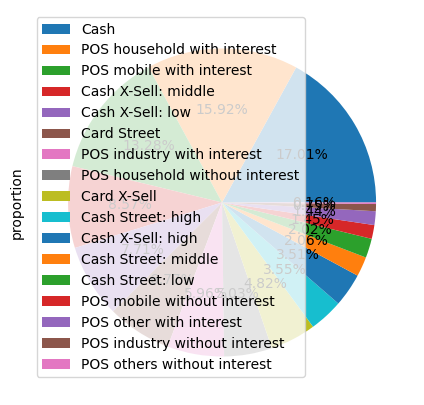

-----------------------


In [119]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()
    print('-----------------------')

99th Percentile 20.0
count    1.048575e+06
mean     1.248486e+01
std      3.333140e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


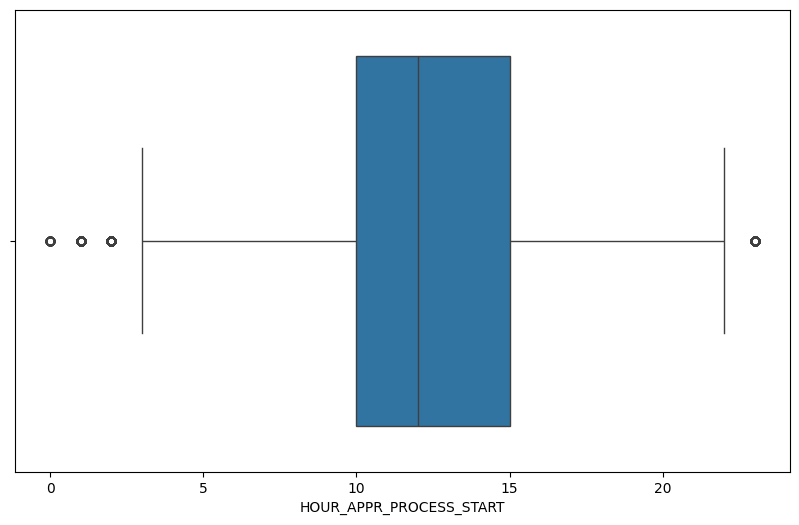

-----------------------
99th Percentile 2834.0
count    1.048575e+06
mean     8.820381e+02
std      7.792649e+02
min      2.000000e+00
25%      2.810000e+02
50%      5.830000e+02
75%      1.303000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


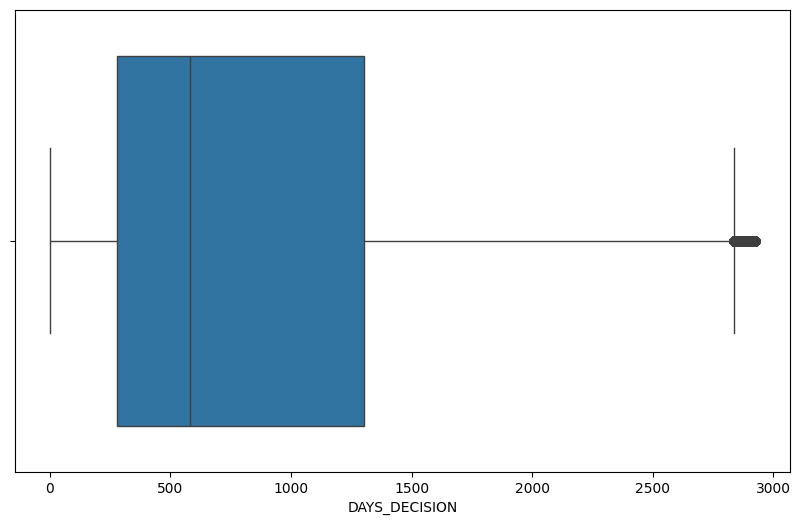

-----------------------
99th Percentile nan
count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64


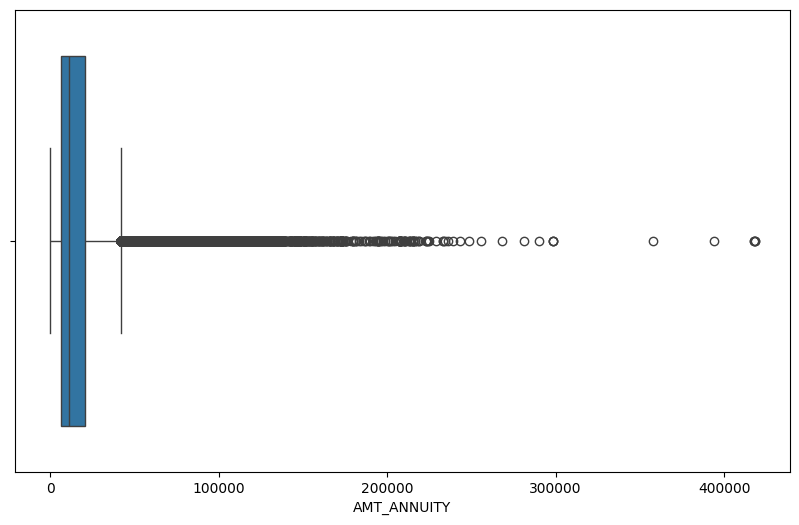

-----------------------
99th Percentile 1350000.0
count    1.048575e+06
mean     1.742698e+05
std      2.910789e+05
min      0.000000e+00
25%      1.890000e+04
50%      7.081650e+04
75%      1.800000e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


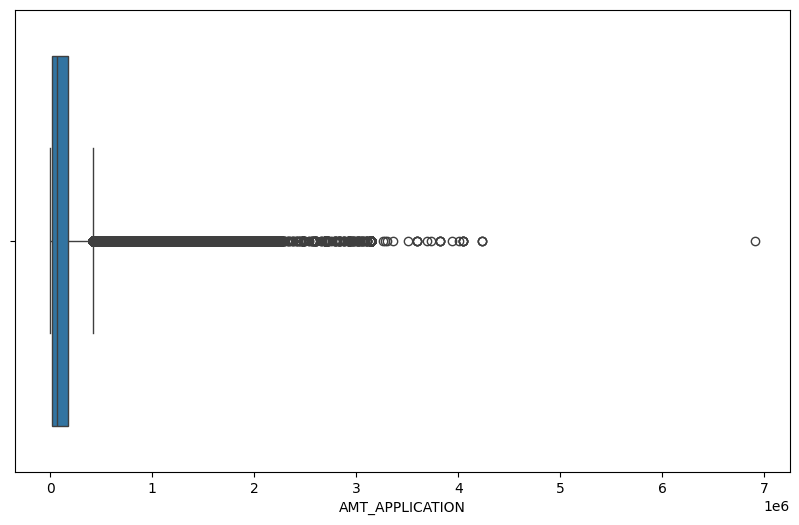

-----------------------
99th Percentile 1506816.0
count    1.048575e+06
mean     1.950000e+05
std      3.169407e+05
min      0.000000e+00
25%      2.427750e+04
50%      8.025300e+04
75%      2.152395e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


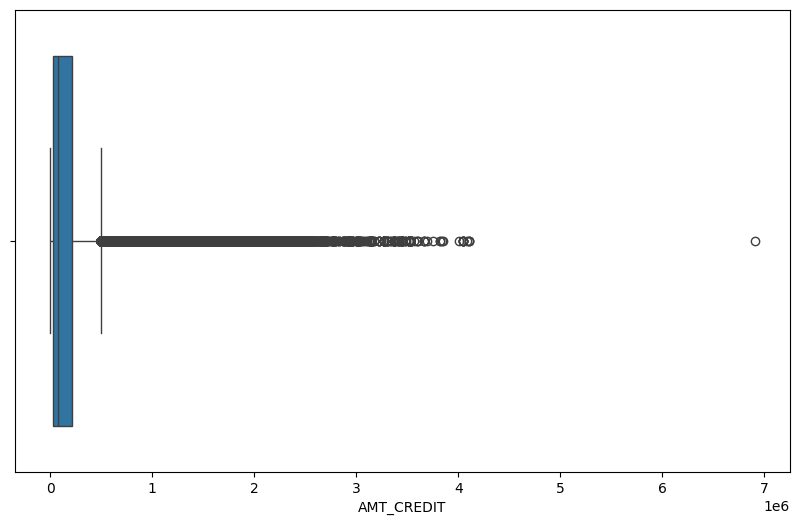

-----------------------
99th Percentile nan
count    8.076100e+05
mean     2.262892e+05
std      3.134490e+05
min      0.000000e+00
25%      5.058000e+04
50%      1.115116e+05
75%      2.295000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


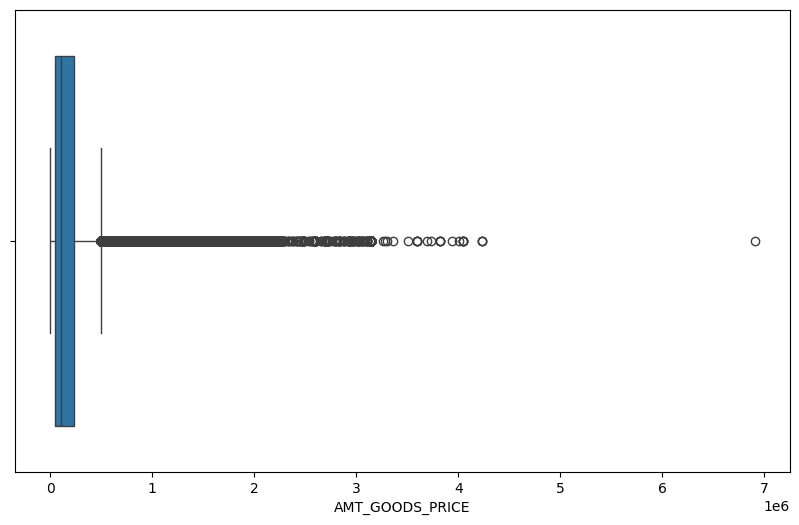

-----------------------
99th Percentile nan
count    815569.000000
mean         15.995639
std          14.508109
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64


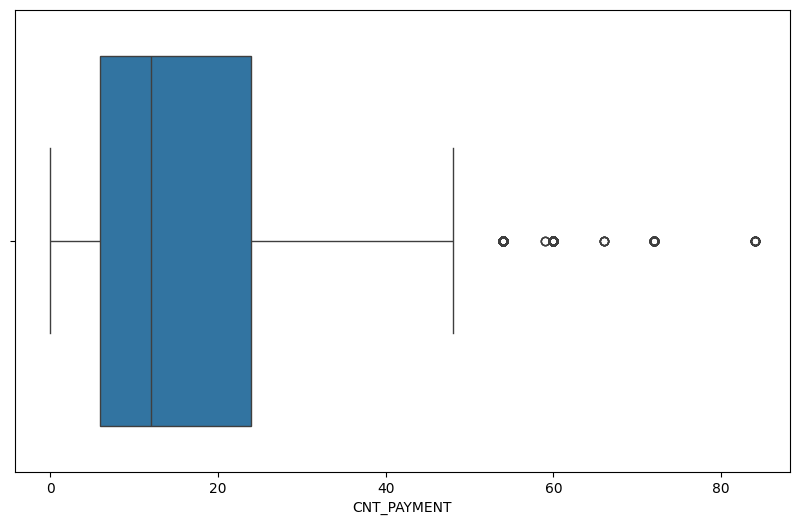

-----------------------


In [120]:
for col in num_cols:
    print("99th Percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print('-----------------------')

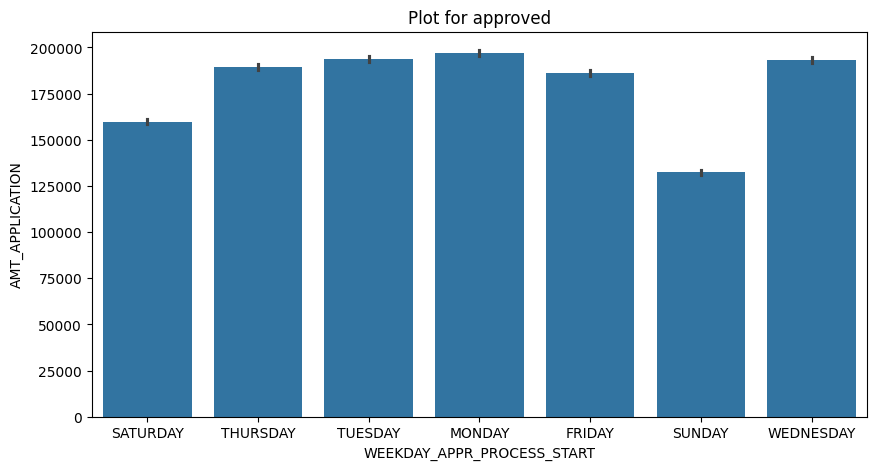

In [121]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=approved)
plt.title("Plot for approved")
plt.show()

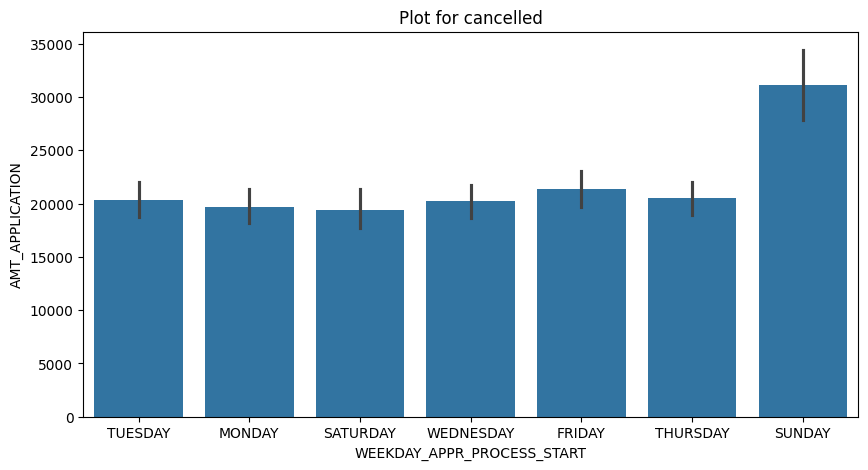

In [122]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=canceled)
plt.title("Plot for cancelled")
plt.show()

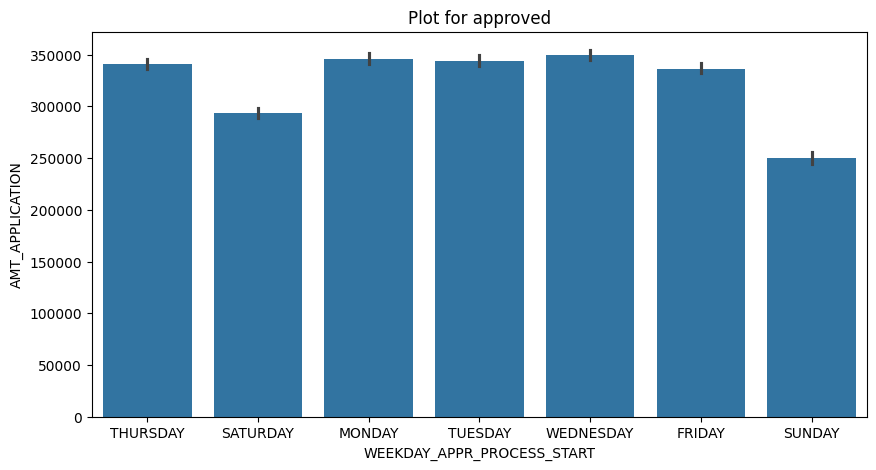

In [123]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=refused)
plt.title("Plot for approved")
plt.show()

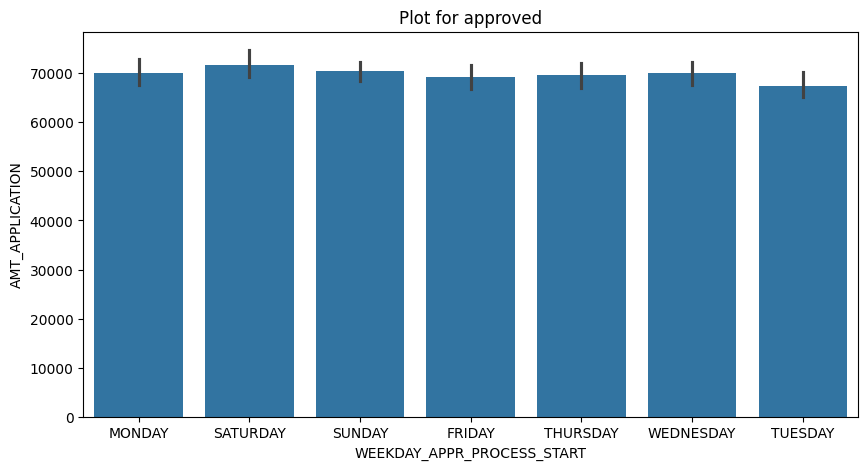

In [124]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=unused)
plt.title("Plot for approved")
plt.show()

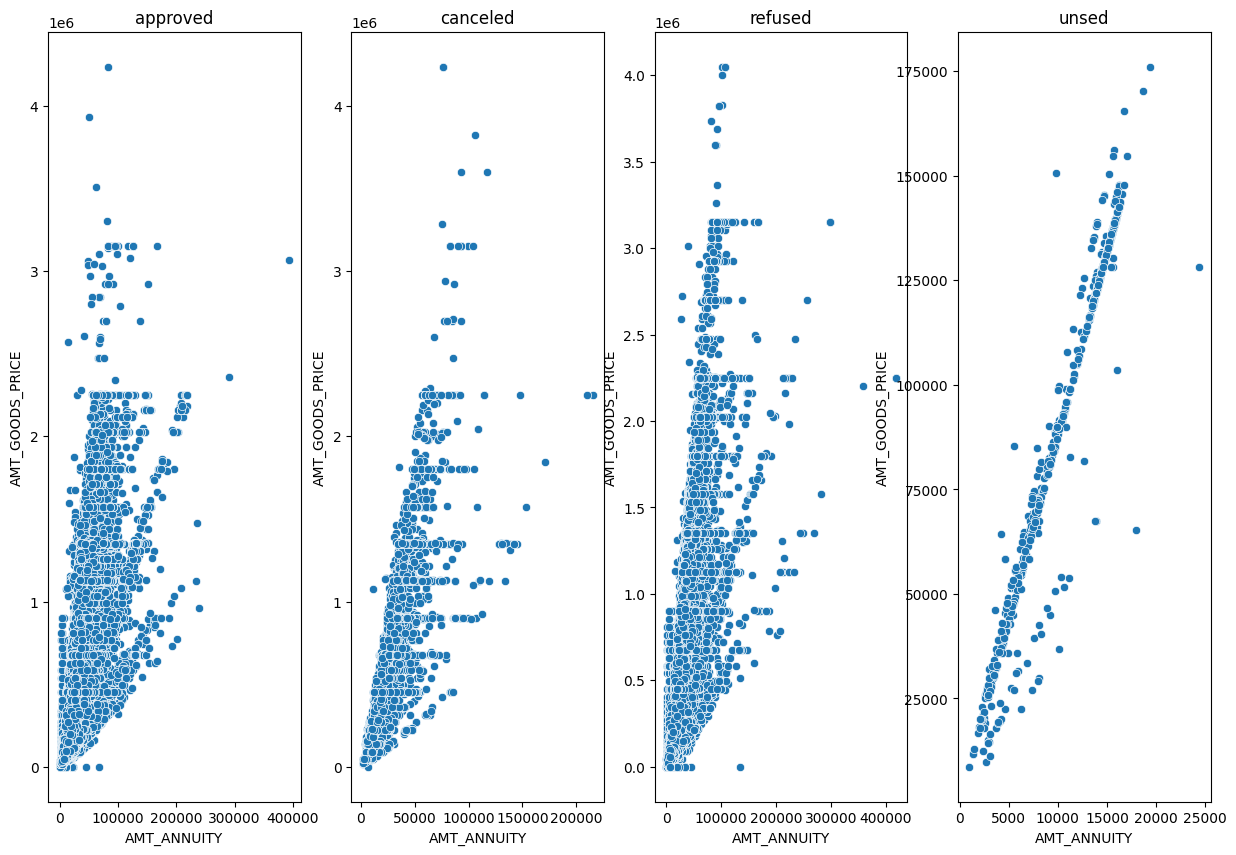

In [127]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title('approved')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=approved)
plt.subplot(1,4,2)
plt.title('canceled')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=canceled)
plt.subplot(1,4,3)
plt.title('refused')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=refused)
plt.subplot(1,4,4)
plt.title('unsed')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)
plt.show()

In [129]:
corr_approved=approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_canceled=canceled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_refused=refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_unused=unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]

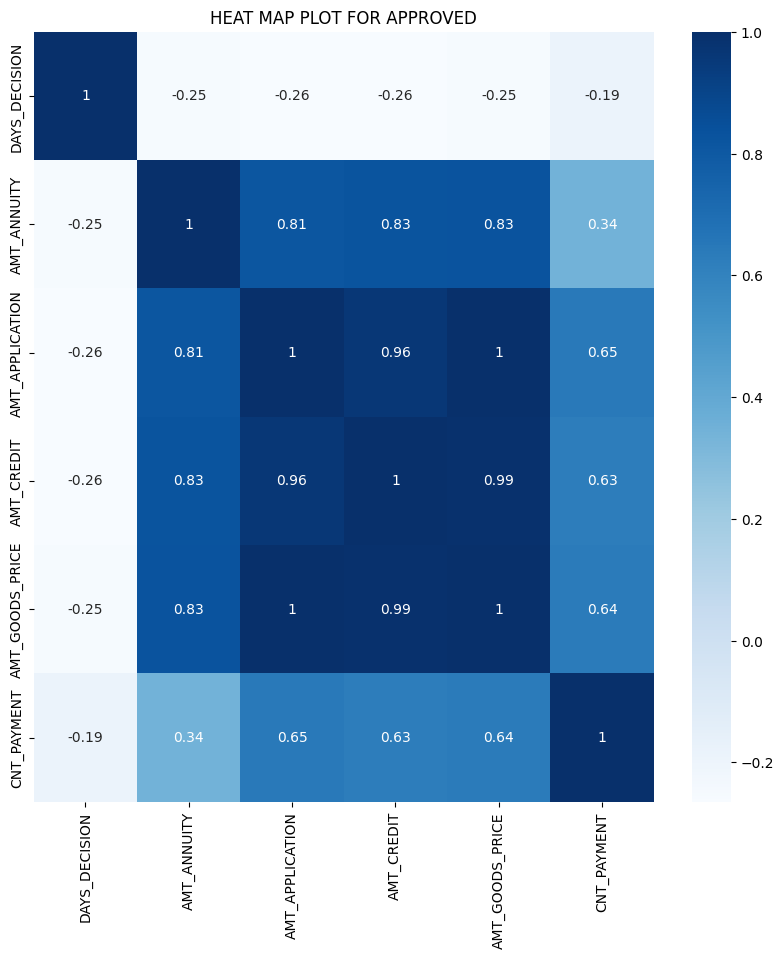

In [131]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("HEAT MAP PLOT FOR APPROVED")
plt.show()

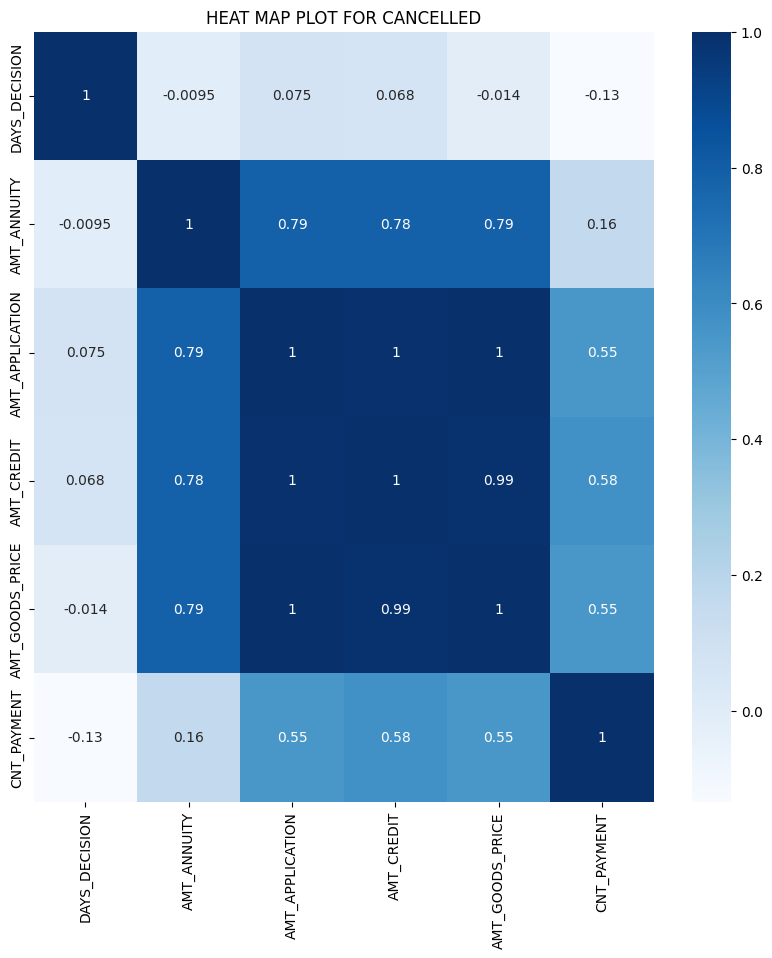

In [132]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_canceled.corr(),annot=True,cmap="Blues")
plt.title("HEAT MAP PLOT FOR CANCELLED")
plt.show()

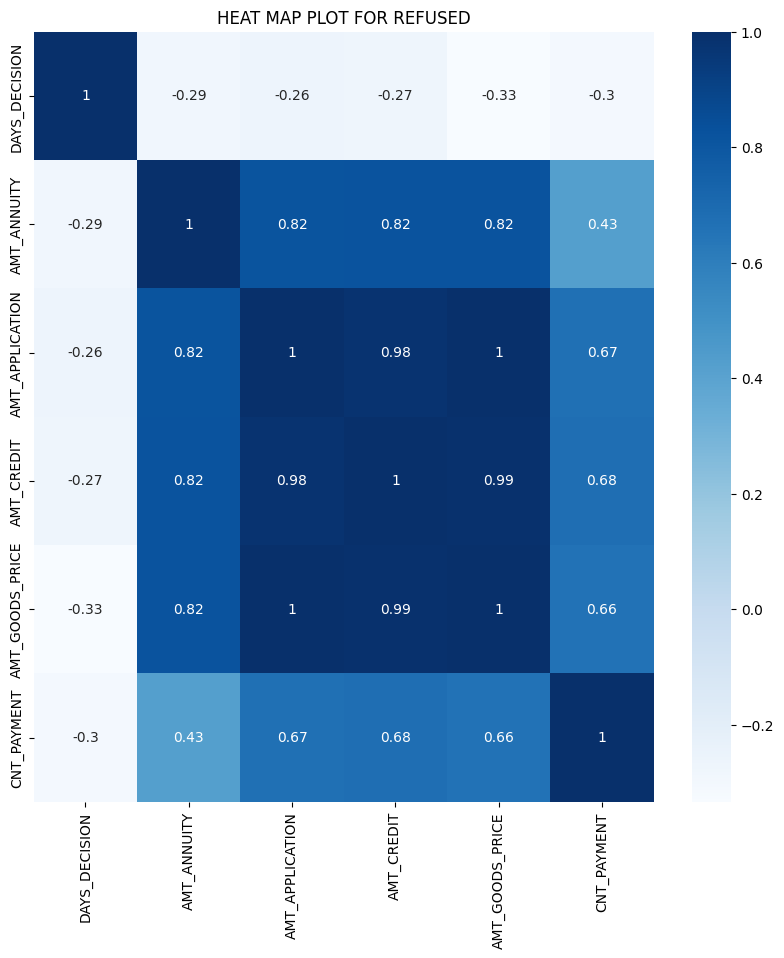

In [133]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Blues")
plt.title("HEAT MAP PLOT FOR REFUSED")
plt.show()

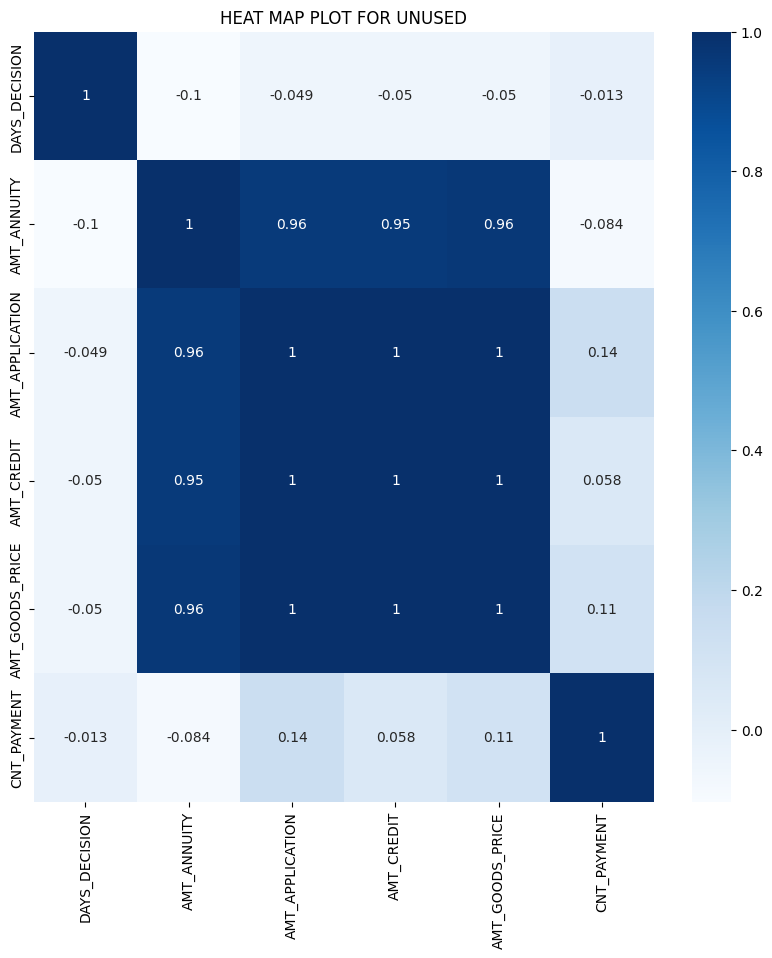

In [134]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_unused.corr(),annot=True,cmap="Blues")
plt.title("HEAT MAP PLOT FOR UNUSED")
plt.show()

In [135]:
merge_df=app_df.merge(papp_df,on=['SK_ID_CURR'],how='left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100004       0      Revolving loans           M            Y   
4      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               Y             0           67500.0      135000.0   
4               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3         6750.0           135000.0   Unaccompanied          Working   
4        29686.5           297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.010032       19046            225             4260.0   
4                    0.008019       19005           3039             9833.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3             2531           1               1                1   
4             2437           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0        Laborers              1.0   
4                 1           0           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                          9   
4                    WEDNESDAY                         17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [136]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932527 entries, 0 to 932526
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 779.1+ MB


In [137]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [139]:
merge_df.shape

(932527, 84)

In [140]:
res1=pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.082401  0.142132  0.098285   
                     Refreshed         0.058556  0.074420  0.107124   
                     Repeater          0.068399  0.084085  0.113121   
                     XNA               0.092593  0.058252  0.062500   
Maternity leave      Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.059060  0.119403  0.060201   
                     Refreshed         0.046062  0.058052  0.087282   
                     Repeater          0.052036  0.061783  0.078342   
                     XNA               0.000000  0.053435  0.103448   
State servant        New               0.060340  0.067416  0.058065   
                     Refreshed         0.042450  0.053140  0.092025   
                     Repeater          0.054481  0.075149  0.086099   
                     XNA               0.052632  0.000000  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.454545       NaN  0.000000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.424242  0.666667  0.652174   
Working              New               0.103741  0.153368  0.140629   
                     Refreshed         0.076859  0.095769  0.134194   
                     Repeater          0.084400  0.111560  0.142641   
                     XNA               0.062500  0.129032  0.164948   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.062295  
                     Refreshed             0.039387  
                     Repeater              0.076083  
                     XNA                   0.333333  
Maternity leave      Repeater                   NaN  
Pensioner            New                   0.064220  
                     Refreshed             0.043243  
                     Repeater              0.048369  
                     XNA                        NaN  
State servant        New                   0.101449  
                     Refreshed             0.075949  
                     Repeater              0.067215  
                     XNA                        NaN  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Working              New                   0.098338  
                     Refreshed             0.081649  
                     Repeater              0.093893  
                     XNA                   0.000000

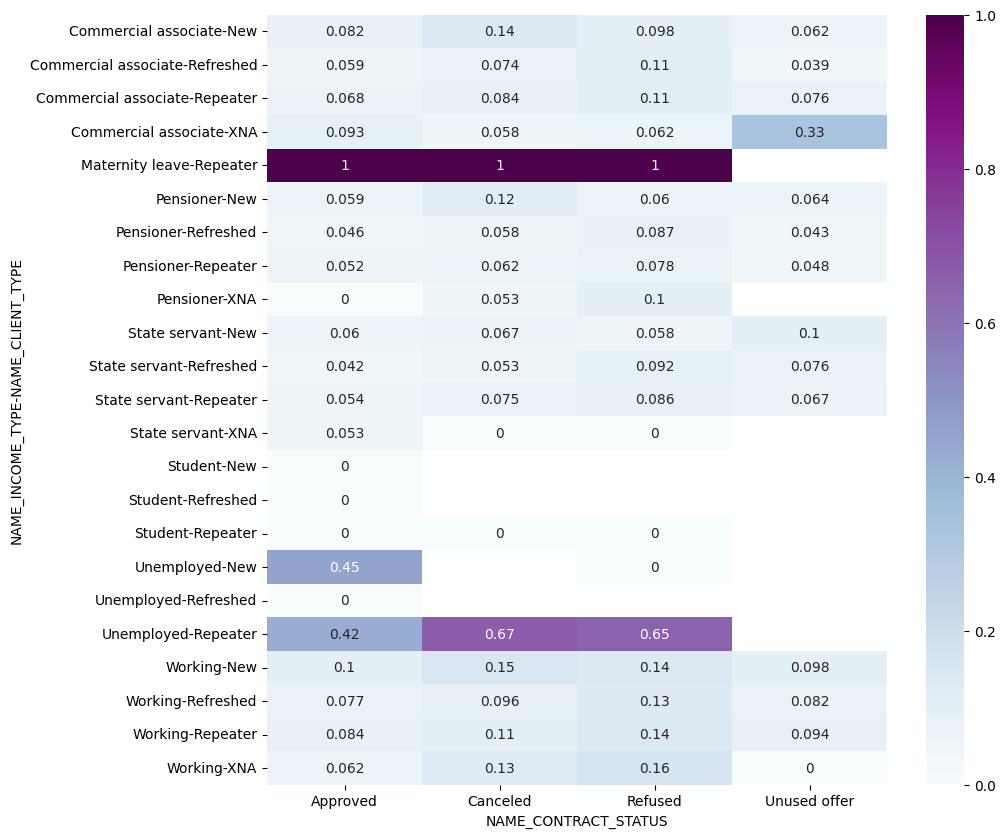

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(res1,annot=True,cmap='BuPu')
plt.show()

In [142]:
res2=pd.pivot_table(data=merge_df,index=["CODE_GENDER","NAME_SELLER_INDUSTRY"],columns=["TARGET"],values="AMT_GOODS_PRICE_x",aggfunc="sum")
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       3.856818e+08  3.243150e+07
            Clothing              5.933673e+09  3.087563e+08
            Connectivity          4.458979e+10  3.759690e+09
            Construction          5.547064e+09  3.312630e+08
            Consumer electronics  6.864776e+10  4.569931e+09
            Furniture             1.255195e+10  6.314895e+08
            Industry              3.609702e+09  2.236905e+08
            Jewelry               4.073209e+08  2.759888e+07
            MLM partners          2.230067e+08  1.615950e+07
            Tourism               1.065915e+08  3.915000e+06
            XNA                   1.503802e+11  1.290770e+10
M           Auto technology       7.281843e+08  9.078300e+07
            Clothing              8.992105e+08  7.615800e+07
            Connectivity          2.521755e+10  2.883382e+09
            Construction          2.451326e+09  1.992726e+08
            Consumer electronics  3.993851e+10  3.679016e+09
            Furniture             3.674324e+09  3.001214e+08
            Industry              1.865168e+09  1.603655e+08
            Jewelry               1.328938e+08  1.567350e+07
            MLM partners          2.951100e+07  4.833000e+06
            Tourism               3.034350e+07  9.585000e+05
            XNA                   6.309865e+10  7.493365e+09
XNA         Connectivity          1.800000e+06           NaN
            Consumer electronics  2.362500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   1.395000e+07           NaN

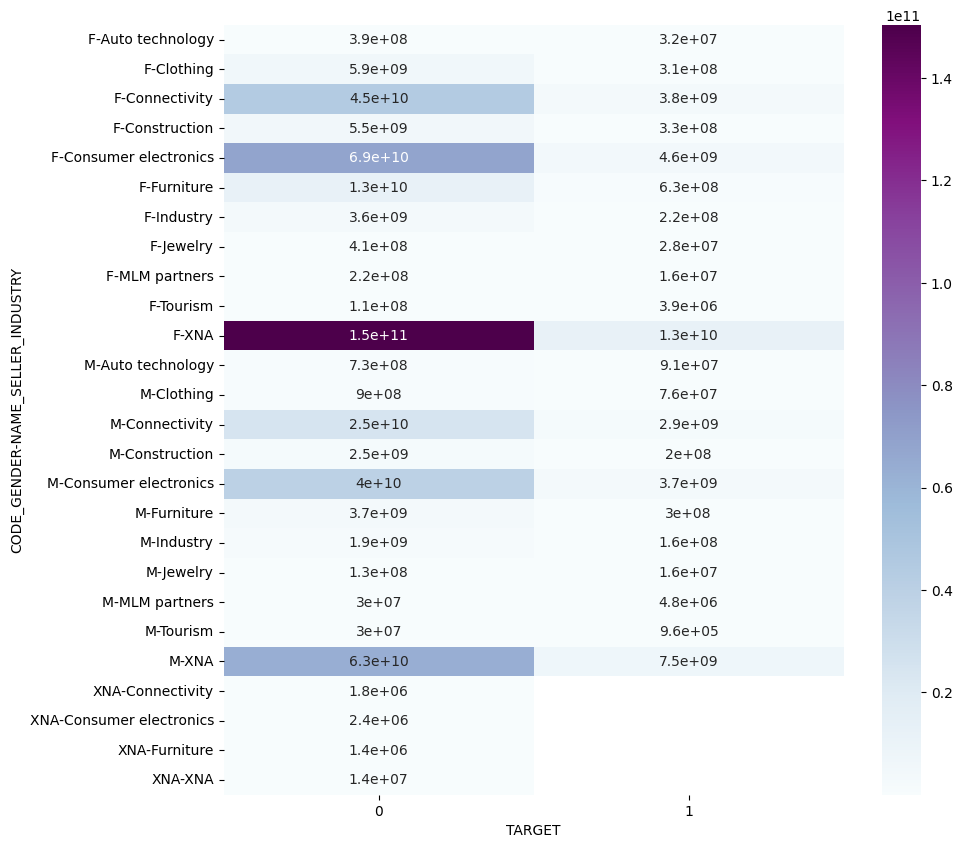

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(res2,annot=True,cmap='BuPu')
plt.show()